# Austin Housing Price Prediction(Linear Regression)

Using a linear regression model for descriptive analysis of various variables to establish a housing price prediction model.

### Steps:
#### 1. Dependent Variable Analysis: Price per unit area.
#### 2. Independent Variable Analysis:
- Distribution analysis of independent variables
- Impact analysis of independent variables on the dependent variable
#### 3. Establishing the Housing Price Prediction Model:
- Linear regression model
- Log-linear model for the dependent variable
- Log-linear model considering interaction terms
#### 4. Prediction:
Suppose there is a family of three, and the parents wish for their child to attend school in Dongcheng District, planning to purchase a 2000-square-feat at zipcode 78731, house age <= 5; how much would it approximately cost?


In [600]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
from numpy import correlate, array
from statsmodels.formula.api import ols

# ignore the version warning
from warnings import filterwarnings
filterwarnings('ignore')

In [601]:
# Load the data
input_file_path = './source/austinHousingData.csv'
raw_data = pd.read_csv(input_file_path, encoding='utf-8', index_col=None)
raw_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [602]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [603]:
# Total Sample Size
raw_data.shape

(15171, 47)

## Data Preparation

In [604]:
# Data Preparation
cols_to_keep = [
    'zipcode',
    'latestPrice',
    'propertyTaxRate',
    'hasAssociation',
    'hasGarage',
    'hasCooling',
    'hasHeating',
    'hasSpa',
    'hasView',
    'homeType',
    'yearBuilt',
    'lotSizeSqFt',
    'livingAreaSqFt',
    'latest_saledate',
    'numOfPrimarySchools',
    'numOfMiddleSchools',
    'numOfHighSchools',
    'avgSchoolDistance',
    'avgSchoolRating',
    'avgSchoolSize',
    'MedianStudentsPerTeacher',
    'numOfBathrooms',
    'numOfBedrooms',
    'numOfStories'
]

house_df=raw_data[cols_to_keep]
house_df

,zipcode,latestPrice,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,...,numOfPrimarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,78660,305000,1.98,True,True,True,True,False,False,Single Family,...,1,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,78660,295000,1.98,True,True,True,True,False,False,Single Family,...,1,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,78660,256125,1.98,True,False,True,True,False,False,Single Family,...,0,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,78660,240000,1.98,True,True,True,True,False,False,Single Family,...,1,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,78660,239900,1.98,True,False,True,True,False,False,Single Family,...,1,1,1,1.133333,4.000000,1223,14,3.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,330000,1.98,False,True,True,True,False,True,Single Family,...,1,1,1,0.900000,3.333333,1424,14,2.0,3,1
15167,78741,550000,1.98,True,True,True,True,True,True,Single Family,...,1,1,1,1.900000,6.666667,1226,16,4.0,3,3
15168,78704,875000,1.98,False,True,True,True,False,False,Single Family,...,1,1,1,0.800000,5.000000,889,13,3.0,3,2
15169,78722,420000,1.98,False,False,True,True,False,False,MultiFamily,...,1,1,1,1.300000,6.666667,1057,15,2.0,4,1


In [605]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zipcode                   15171 non-null  int64  
 1   latestPrice               15171 non-null  int64  
 2   propertyTaxRate           15171 non-null  float64
 3   hasAssociation            15171 non-null  bool   
 4   hasGarage                 15171 non-null  bool   
 5   hasCooling                15171 non-null  bool   
 6   hasHeating                15171 non-null  bool   
 7   hasSpa                    15171 non-null  bool   
 8   hasView                   15171 non-null  bool   
 9   homeType                  15171 non-null  object 
 10  yearBuilt                 15171 non-null  int64  
 11  lotSizeSqFt               15171 non-null  float64
 12  livingAreaSqFt            15171 non-null  int64  
 13  latest_saledate           15171 non-null  object 
 14  numOfP

In [606]:
# Convert boolean columns into integer
house_df['hasAssociation'] = house_df['hasAssociation'].astype(int)
house_df['hasCooling'] = house_df['hasCooling'].astype(int)
house_df['hasHeating'] = house_df['hasHeating'].astype(int)
house_df['hasSpa'] = house_df['hasSpa'].astype(int)
house_df['hasView'] = house_df['hasView'].astype(int)
house_df['hasGarage'] = house_df['hasGarage'].astype(int)

# review
house_df

,zipcode,latestPrice,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,...,numOfPrimarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
0,78660,305000,1.98,1,1,1,1,0,0,Single Family,...,1,1,1,1.266667,2.666667,1063,14,3.0,4,2
1,78660,295000,1.98,1,1,1,1,0,0,Single Family,...,1,1,1,1.400000,2.666667,1063,14,2.0,4,1
2,78660,256125,1.98,1,0,1,1,0,0,Single Family,...,0,1,1,1.200000,3.000000,1108,14,2.0,3,1
3,78660,240000,1.98,1,1,1,1,0,0,Single Family,...,1,1,1,1.400000,2.666667,1063,14,2.0,3,1
4,78660,239900,1.98,1,0,1,1,0,0,Single Family,...,1,1,1,1.133333,4.000000,1223,14,3.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,330000,1.98,0,1,1,1,0,1,Single Family,...,1,1,1,0.900000,3.333333,1424,14,2.0,3,1
15167,78741,550000,1.98,1,1,1,1,1,1,Single Family,...,1,1,1,1.900000,6.666667,1226,16,4.0,3,3
15168,78704,875000,1.98,0,1,1,1,0,0,Single Family,...,1,1,1,0.800000,5.000000,889,13,3.0,3,2
15169,78722,420000,1.98,0,0,1,1,0,0,MultiFamily,...,1,1,1,1.300000,6.666667,1057,15,2.0,4,1


In [607]:
# Add new column: price per square feat
house_df['price_per_sqft'] = house_df['latestPrice'] / house_df['livingAreaSqFt']

# Add new column: house age
house_df['latest_saledate'] = pd.to_datetime(house_df['latest_saledate'])
house_df['house_age'] = house_df['latest_saledate'].dt.year - house_df['yearBuilt']

#review
house_df.head()

,zipcode,latestPrice,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,price_per_sqft,house_age
0,78660,305000,1.98,1,1,1,1,0,0,Single Family,...,1,1.266667,2.666667,1063,14,3.0,4,2,117.262591,7
1,78660,295000,1.98,1,1,1,1,0,0,Single Family,...,1,1.400000,2.666667,1063,14,2.0,4,1,166.855204,7
2,78660,256125,1.98,1,0,1,1,0,0,Single Family,...,1,1.200000,3.000000,1108,14,2.0,3,1,173.291610,1
3,78660,240000,1.98,1,1,1,1,0,0,Single Family,...,1,1.400000,2.666667,1063,14,2.0,3,1,143.027414,5
4,78660,239900,1.98,1,0,1,1,0,0,Single Family,...,1,1.133333,4.000000,1223,14,3.0,3,2,112.523452,16


In [608]:
# Adjust lotsizesqft, lingareasqft, avgschooldistance, periceperqdft into 2 decimal places
house_df['lotSizeSqFt'] = round(house_df['lotSizeSqFt'], 2)
house_df['livingAreaSqFt'] = round(house_df['livingAreaSqFt'], 2)
house_df['avgSchoolDistance'] = round(house_df['avgSchoolDistance'], 2)
house_df['price_per_sqft'] = round(house_df['price_per_sqft'], 2)
# review
house_df

,zipcode,latestPrice,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,price_per_sqft,house_age
0,78660,305000,1.98,1,1,1,1,0,0,Single Family,...,1,1.27,2.666667,1063,14,3.0,4,2,117.26,7
1,78660,295000,1.98,1,1,1,1,0,0,Single Family,...,1,1.40,2.666667,1063,14,2.0,4,1,166.86,7
2,78660,256125,1.98,1,0,1,1,0,0,Single Family,...,1,1.20,3.000000,1108,14,2.0,3,1,173.29,1
3,78660,240000,1.98,1,1,1,1,0,0,Single Family,...,1,1.40,2.666667,1063,14,2.0,3,1,143.03,5
4,78660,239900,1.98,1,0,1,1,0,0,Single Family,...,1,1.13,4.000000,1223,14,3.0,3,2,112.52,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,330000,1.98,0,1,1,1,0,1,Single Family,...,1,0.90,3.333333,1424,14,2.0,3,1,267.42,34
15167,78741,550000,1.98,1,1,1,1,1,1,Single Family,...,1,1.90,6.666667,1226,16,4.0,3,3,291.31,4
15168,78704,875000,1.98,0,1,1,1,0,0,Single Family,...,1,0.80,5.000000,889,13,3.0,3,2,574.15,85
15169,78722,420000,1.98,0,0,1,1,0,0,MultiFamily,...,1,1.30,6.666667,1057,15,2.0,4,1,69.22,51


In [609]:
# Create a new columns(avgSchoolDistance_new), convert the continuous variable into categorical variable.

# Define the bins and labels according to the specified categories
bins = [0, 1, 3, 5, np.inf]
labels = ['Very_Close', 'Close', 'Moderate', 'Far']

# Create the new categorical column
house_df['avgSchoolDistance_new'] = pd.cut(house_df['avgSchoolDistance'],
                                                 bins=bins,
                                                 labels=labels,
                                                 right=False)

# Review the first few rows to confirm the transformation
print(house_df[['avgSchoolDistance', 'avgSchoolDistance_new']].head())

   avgSchoolDistance avgSchoolDistance_new
0               1.27                 Close
1               1.40                 Close
2               1.20                 Close
3               1.40                 Close
4               1.13                 Close


In [610]:
# Convert house_age values less than or equal to 0 to 1, which helps prevent issues during further analysis, such as when applying logarithmic transformations
house_df['house_age'] = house_df['house_age'].apply(lambda x: 1 if x <= 0 else x)

# Adjust avgschoolrating into 1 decimal places
house_df['avgSchoolRating'] = round(house_df['avgSchoolRating'],1)

In [611]:
# house_df['homeType'].unique

house_df['homeType'] = house_df['homeType'].apply(lambda x: 'Single Family' if x == 'Single Family' else 'Other')

In [612]:
# Delete the columns: latestPrice, latest_saledate
house_df.drop(['latestPrice', 'latest_saledate', 'yearBuilt', 'avgSchoolDistance'], axis=1, inplace=True)

# Review
house_df.head()

,zipcode,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,lotSizeSqFt,...,numOfHighSchools,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,price_per_sqft,house_age,avgSchoolDistance_new
0,78660,1.98,1,1,1,1,0,0,Single Family,6011.0,...,1,2.7,1063,14,3.0,4,2,117.26,7,Close
1,78660,1.98,1,1,1,1,0,0,Single Family,6185.0,...,1,2.7,1063,14,2.0,4,1,166.86,7,Close
2,78660,1.98,1,0,1,1,0,0,Single Family,7840.0,...,1,3.0,1108,14,2.0,3,1,173.29,1,Close
3,78660,1.98,1,1,1,1,0,0,Single Family,6098.0,...,1,2.7,1063,14,2.0,3,1,143.03,5,Close
4,78660,1.98,1,0,1,1,0,0,Single Family,6708.0,...,1,4.0,1223,14,3.0,3,2,112.52,16,Close


In [613]:
#  Data Description
house_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
zipcode,15171.0,NaN,NaN,NaN,78735.932964,18.893475,78617.0,78727.0,78739.0,78749.0,78759.0
propertyTaxRate,15171.0,NaN,NaN,NaN,1.994085,0.053102,1.98,1.98,1.98,1.98,2.21
hasAssociation,15171.0,NaN,NaN,NaN,0.527783,0.499244,0.0,0.0,1.0,1.0,1.0
hasGarage,15171.0,NaN,NaN,NaN,0.550129,0.497497,0.0,0.0,1.0,1.0,1.0
hasCooling,15171.0,NaN,NaN,NaN,0.981939,0.133176,0.0,1.0,1.0,1.0,1.0
hasHeating,15171.0,NaN,NaN,NaN,0.990179,0.098618,0.0,1.0,1.0,1.0,1.0
hasSpa,15171.0,NaN,NaN,NaN,0.079032,0.269798,0.0,0.0,0.0,0.0,1.0
hasView,15171.0,NaN,NaN,NaN,0.227737,0.419386,0.0,0.0,0.0,0.0,1.0
homeType,15171,2,Single Family,14241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lotSizeSqFt,15171.0,NaN,NaN,NaN,119083.968123,12252718.775133,100.0,6534.0,8276.0,10890.0,1508482800.0


In [614]:
# Total Sample Size
house_df.shape

(15171, 23)

## Descriptive statistics

### Dependent Variable Analyisis

Note： The dependent variable refers to a variable whose changes or values are caused by one or more independent variables, typically the variable we attempt to predict or explain in a regression model, also known as the "explained variable" or "response variable." In this case, the dependent variable refers to housing prices.

<Figure size 1200x800 with 0 Axes>

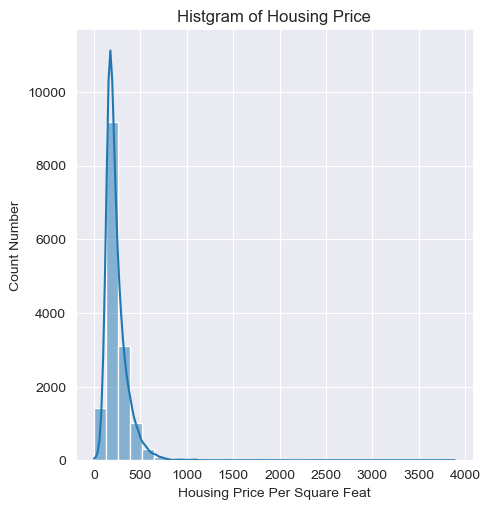

In [615]:
# Histgram of housing price
plt.figure(figsize=(12, 8))
sns.displot(house_df, x='price_per_sqft', bins= 30, kde=True)
plt.xlabel('Housing Price Per Square Feat')
plt.ylabel('Count Number')
plt.title('Histgram of Housing Price')
plt.savefig('./outputs/Histgram of Housing Price.png')
plt.show()

### Observation & Analysis

#### 1. **Right-Skewed Distribution**:

- The histogram is highly right-skewed, meaning that there are a small number of properties with very high prices per square foot, which is dragging the tail of the distribution to the right. This is a common scenario in real estate data, especially in markets with a wide range of property values.

#### 2. **Potential Outliers**:

- The presence of values that go up to 4000 per square foot could indicate outliers, especially if these are far removed from the majority of the data points clustered on the left side of the histogram. Outliers can significantly affect the interpretation of the data and the performance of your models.

#### 3. **Visualization Scale**:

- The x-axis scale goes up to 4000, but most of the data is clustered below 500. This scale can make it difficult to see the distribution of the majority of your data. 


### Solution：
    - **Zooming in** on the range where most of the data is concentrated (e.g., setting the x-axis limits to focus on 0-500 or another appropriate range).
    - **Transforming the data** (e.g., applying a log transformation to the price per square foot) to better visualize the distribution.

In [616]:
# Calculate the mean, median, and STD
agg_num = (
    house_df['price_per_sqft']
    .agg(['mean', 'median', 'std'])
)

print(agg_num)

mean      238.535174
median    206.210000
std       129.694564
Name: price_per_sqft, dtype: float64


In [617]:
# Calculate the quantile
quartiles = (
    house_df['price_per_sqft']
    .quantile([0.25, 0.5, 0.75])
)

print(quartiles)

0.25    162.49
0.50    206.21
0.75    280.63
Name: price_per_sqft, dtype: float64


### Independent Variable Analysis

Note： In statistics and regression analysis, "independent variable" refers to a variable used to explain or predict another variable (called the dependent variable). Independent variables are typically considered independent and can influence changes in the dependent variable. Mathematically, independent variables are usually represented as X, while dependent variables are represented as Y.

In [618]:
# For numerical independent variable， calculate the 'min', 'mean', 'median', 'max', and 'std' 

# Define the numerical columns
num_cols = [
    'price_per_sqft', 
    'lotSizeSqFt', 
    'livingAreaSqFt', 
    'propertyTaxRate',  
    'house_age',
    'numOfBathrooms',
    'numOfBedrooms',
    'numOfStories',
    'propertyTaxRate'
]

# Initialize an empty DataFrame to store the results
summary_df = pd.DataFrame()

# Loop through each column and calculate the summary statistics
for col in num_cols:
    num_cols_agg = house_df[col].agg(['min', 'mean', 'median', 'max', 'std'])
    summary_df[col] = num_cols_agg

# Transpose the DataFrame to get a cross table format
summary_df = summary_df.T

# Display the summary cross table
summary_df

,min,mean,median,max,std
price_per_sqft,0.93,238.535174,206.21,3.887780e+03,1.296946e+02
lotSizeSqFt,100.00,119083.968123,8276.00,1.508483e+09,1.225272e+07
livingAreaSqFt,300.00,2208.323314,1975.00,1.092920e+05,1.378576e+03
propertyTaxRate,1.98,1.994085,1.98,2.210000e+00,5.310204e-02
house_age,1.00,30.545778,26.00,1.130000e+02,2.154150e+01
numOfBathrooms,0.00,2.683010,3.00,2.700000e+01,1.054445e+00
numOfBedrooms,0.00,3.440380,3.00,2.000000e+01,8.499418e-01
numOfStories,1.00,1.467273,1.00,4.000000e+00,5.236969e-01


In [619]:
# For Non-numerical independent variables, count the frequency and draw a donut chart.

# Define a function to create a donut chart
def pie(data):
    plt.figure(figsize=(5, 5))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})

    # Draw a circle at the center to make it a donut
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(centre_circle)

    plt.title(f'Ratio of {data.name}')
    plt.axis('equal')  # Ensure the pie is drawn as a circle
    plt.savefig(f'./outputs/{data.name}_Pie_chart.png')
    plt.show()

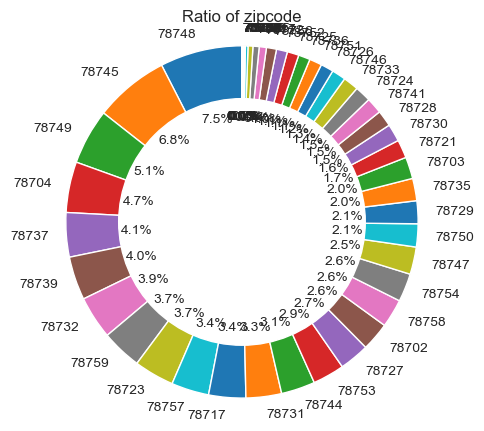

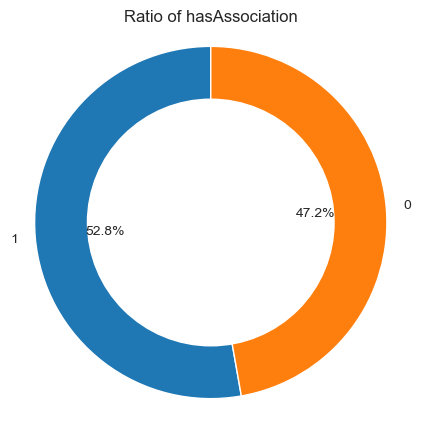

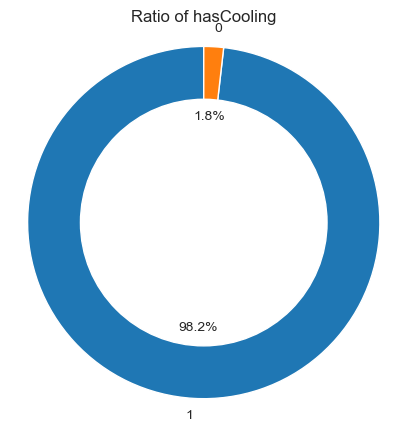

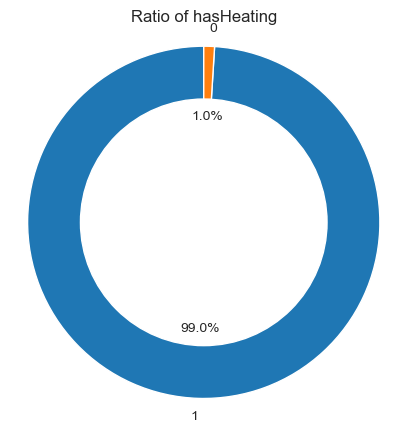

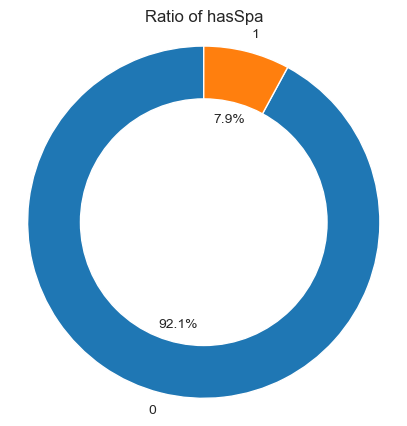

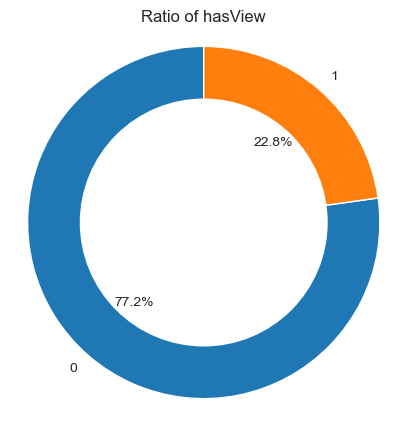

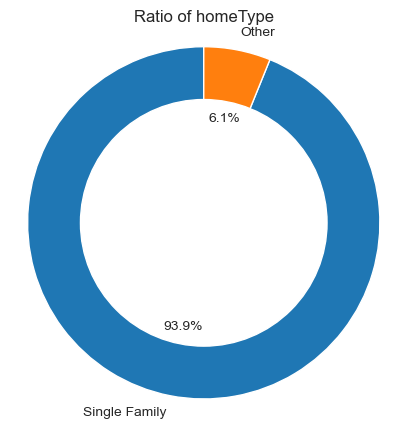

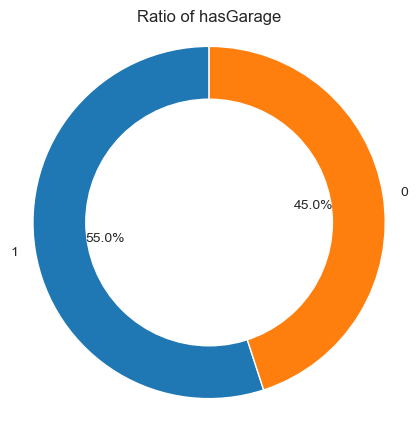

In [620]:
# List of non-numerical columns
non_numberical_cols = [
    'zipcode', 
    'hasAssociation', 
    'hasCooling',
    'hasHeating', 
    'hasSpa',
    'hasView', 
    'homeType',
    'hasGarage'
]

# Loop through each non-numerical column and generate a donut chart
for col in non_numberical_cols:
    data = house_df[col].value_counts()
    data.name = col  # Set the name for the index
    pie(data)

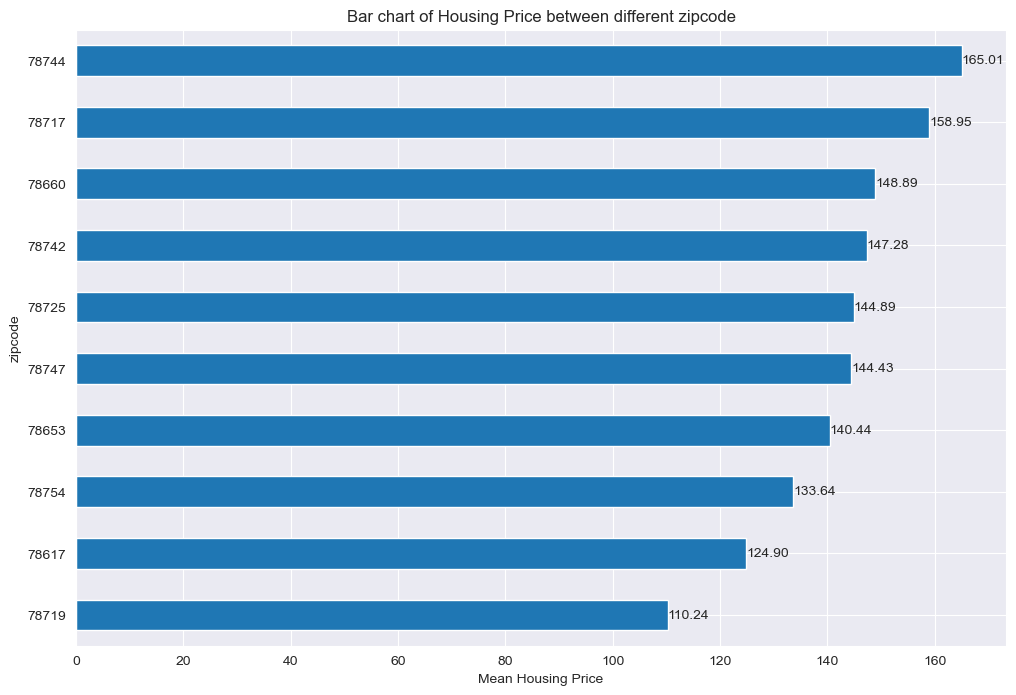

In [621]:
# Calculate the mean price between different city,then build a bar chart

mean_prices = (
    house_df['price_per_sqft']
    .groupby(house_df['zipcode'])
    .mean()
    .sort_values(ascending=True)
    .head(10)
)


plt.figure(figsize=(12, 8))
fig = mean_prices.plot(kind='barh')
# Add price labels to the bars
for index, value in enumerate(mean_prices):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Bar chart of Housing Price between different zipcode')
plt.xlabel('Mean Housing Price')
plt.savefig('./outputs/Bar_chart_of_Housing_Price_between_different_zipcode.png')
plt.show()

### Observe the relationship between each independent variable and the dependent variable.

In [622]:
# Define a function to create side-by-side violin and box plots
def relation_plot(df, xdata, ydata):
    plt.figure(figsize=(16, 8))  # Adjusted size to fit both plots

    # Create a grid for subplots
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    sns.violinplot(x=xdata, y=ydata, data=df)
    plt.title(f'Violin Plot of Housing Prices by {xdata}')
    plt.xlabel(xdata)
    plt.ylabel('Housing Price')

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    sns.boxplot(x=xdata, y=ydata, data=df, showfliers=False)
    plt.title(f'Box Plot of Housing Prices by {xdata}')
    plt.xlabel(xdata)
    plt.ylabel('Housing Price')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'./outputs/Violin_and_Box_Plot_by_{xdata}.png')
    plt.show()#### Categorical Variable

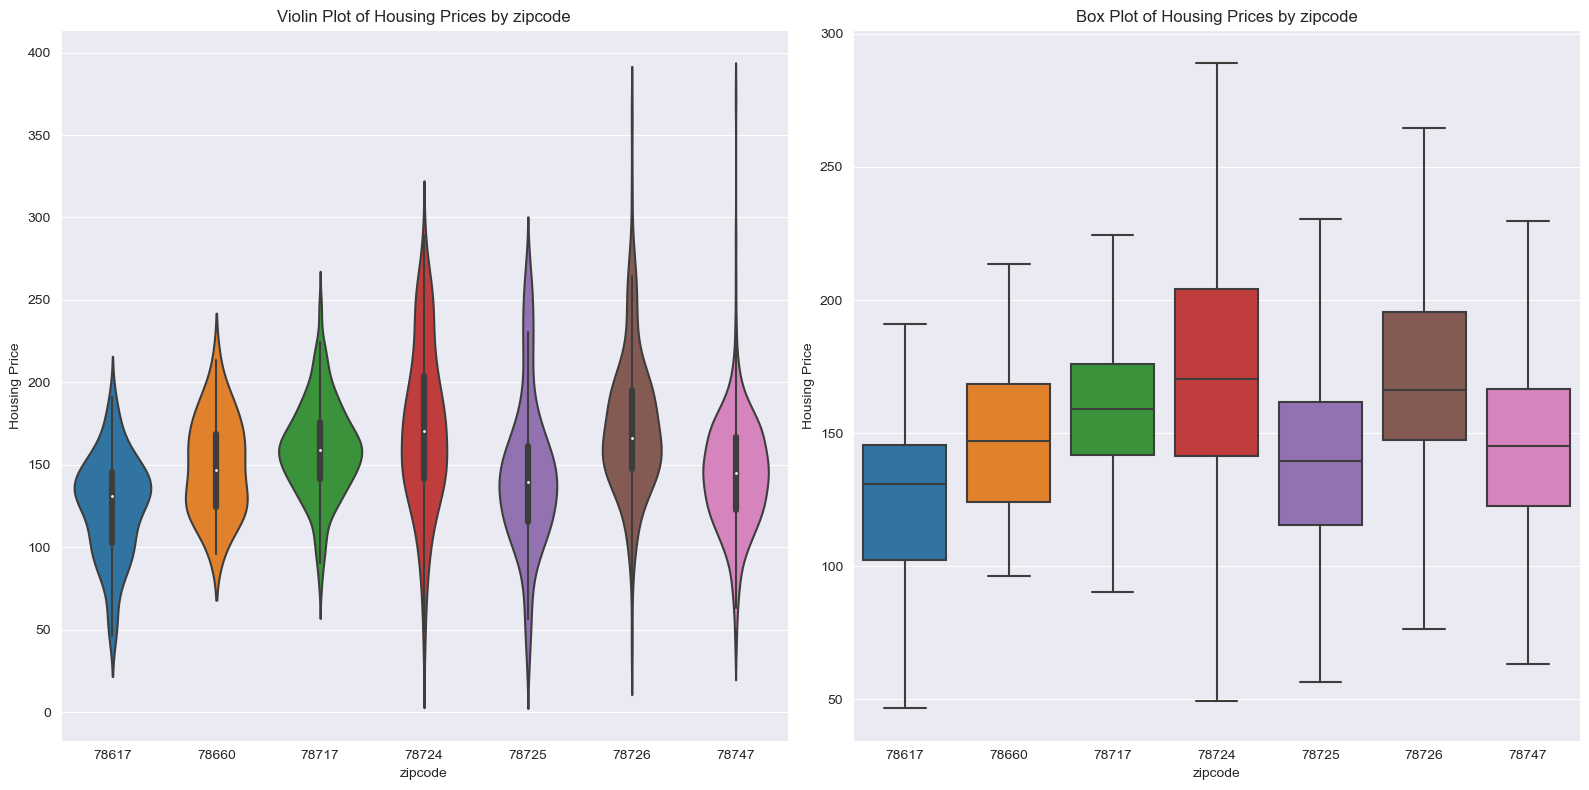

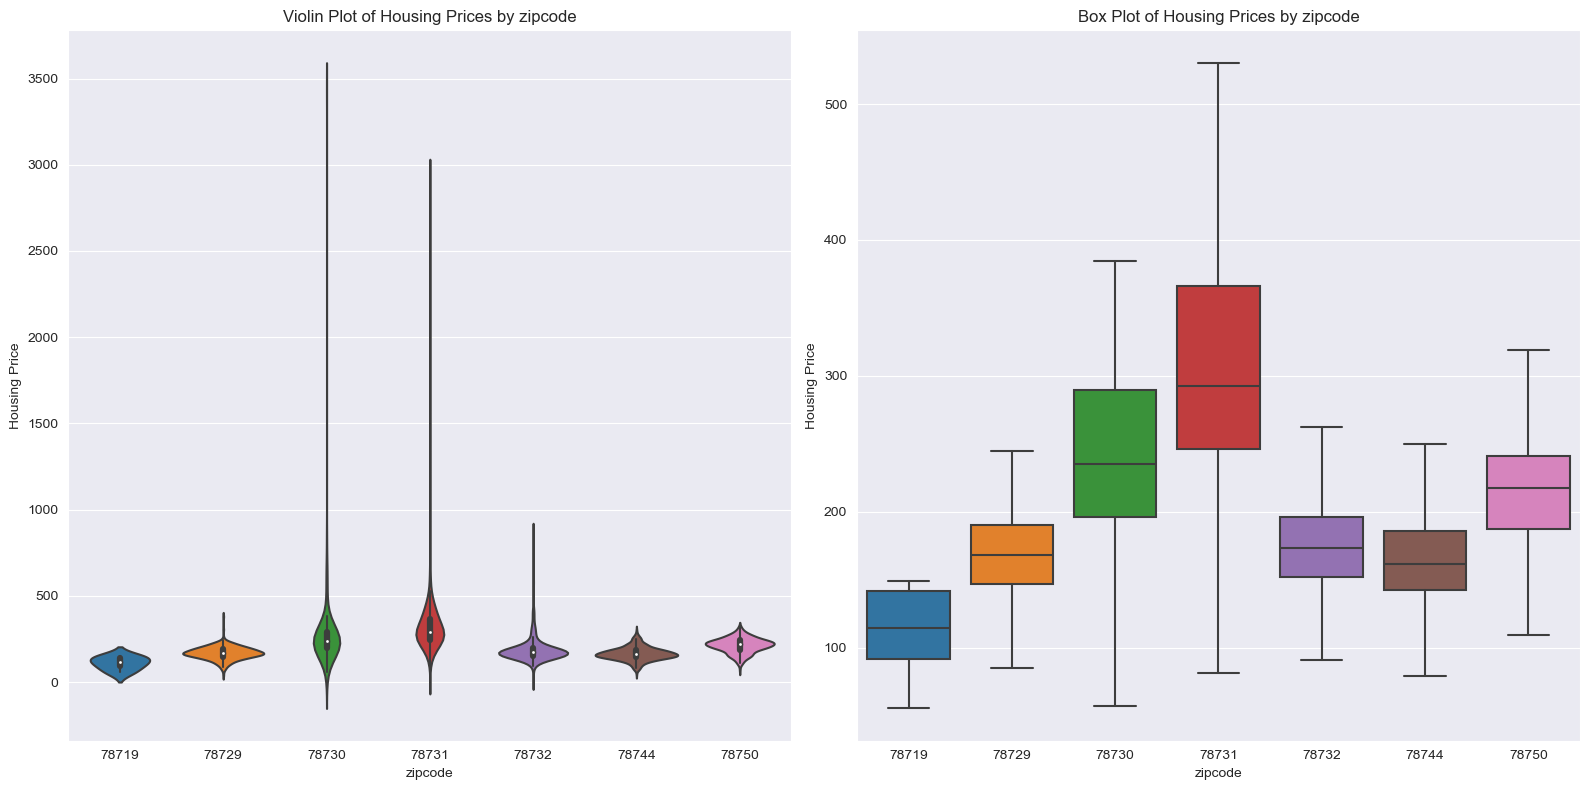

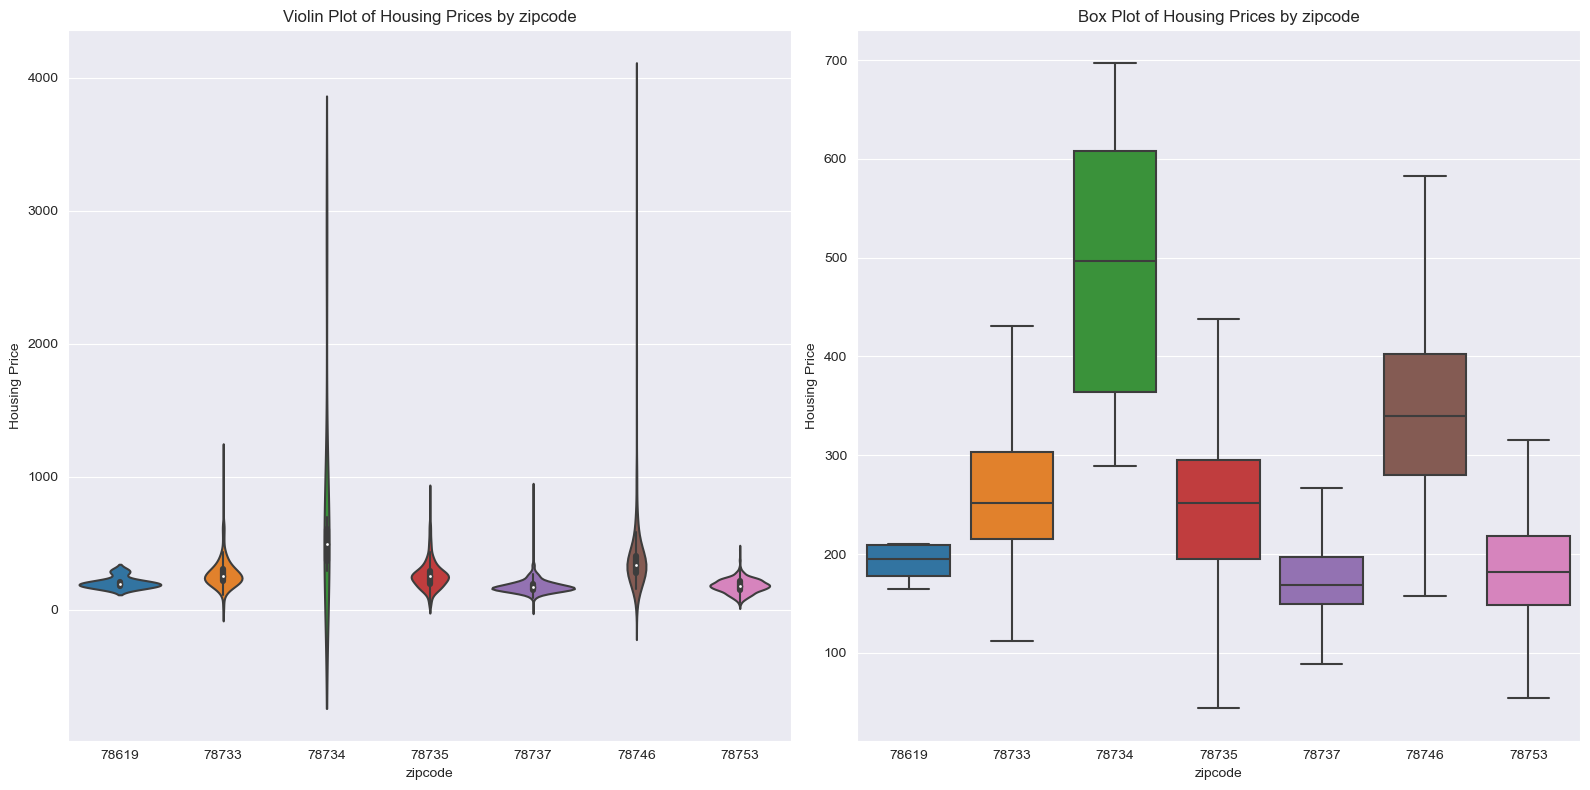

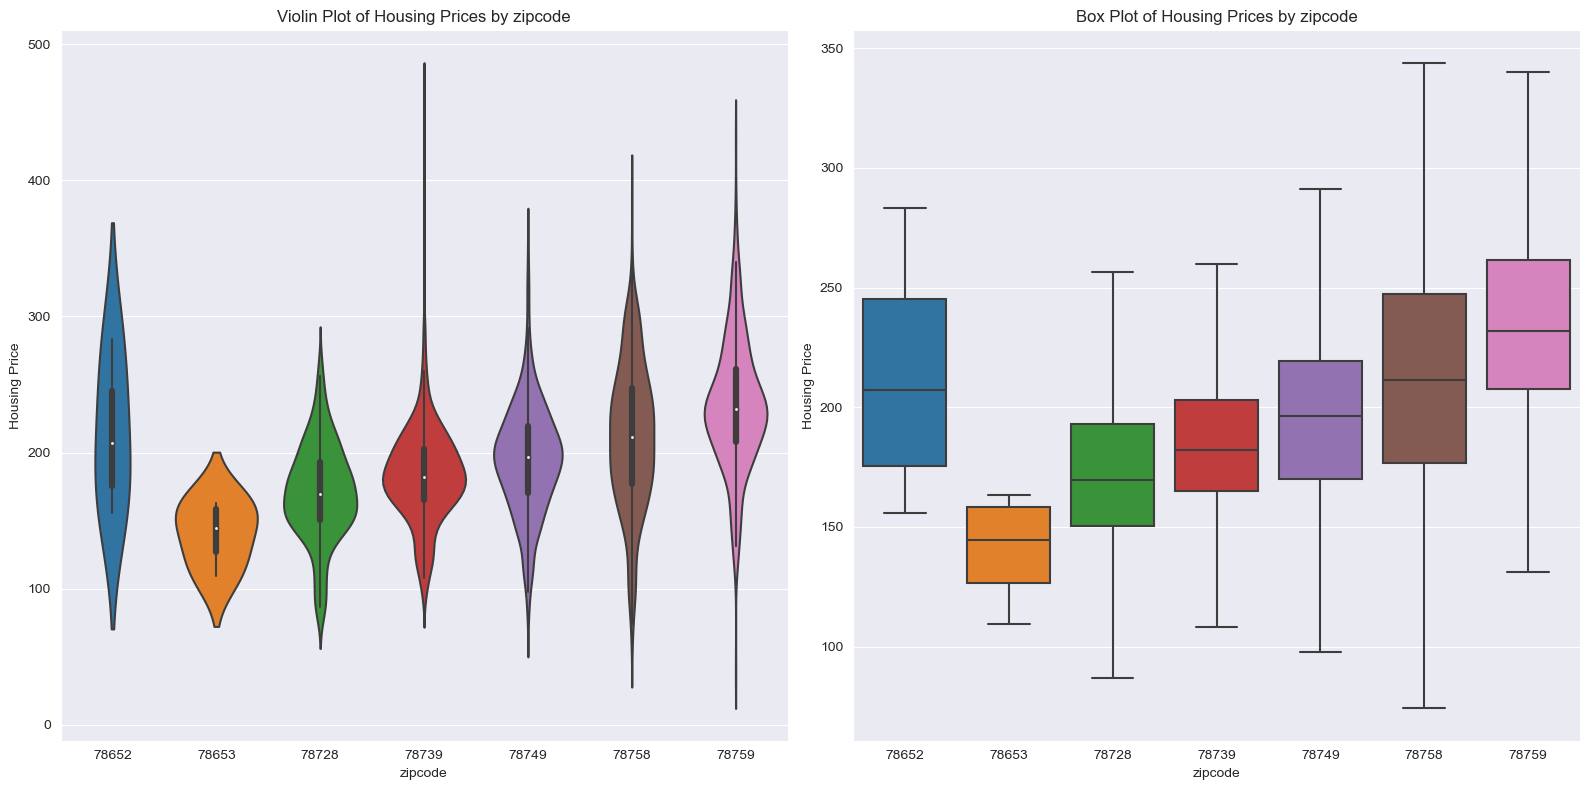

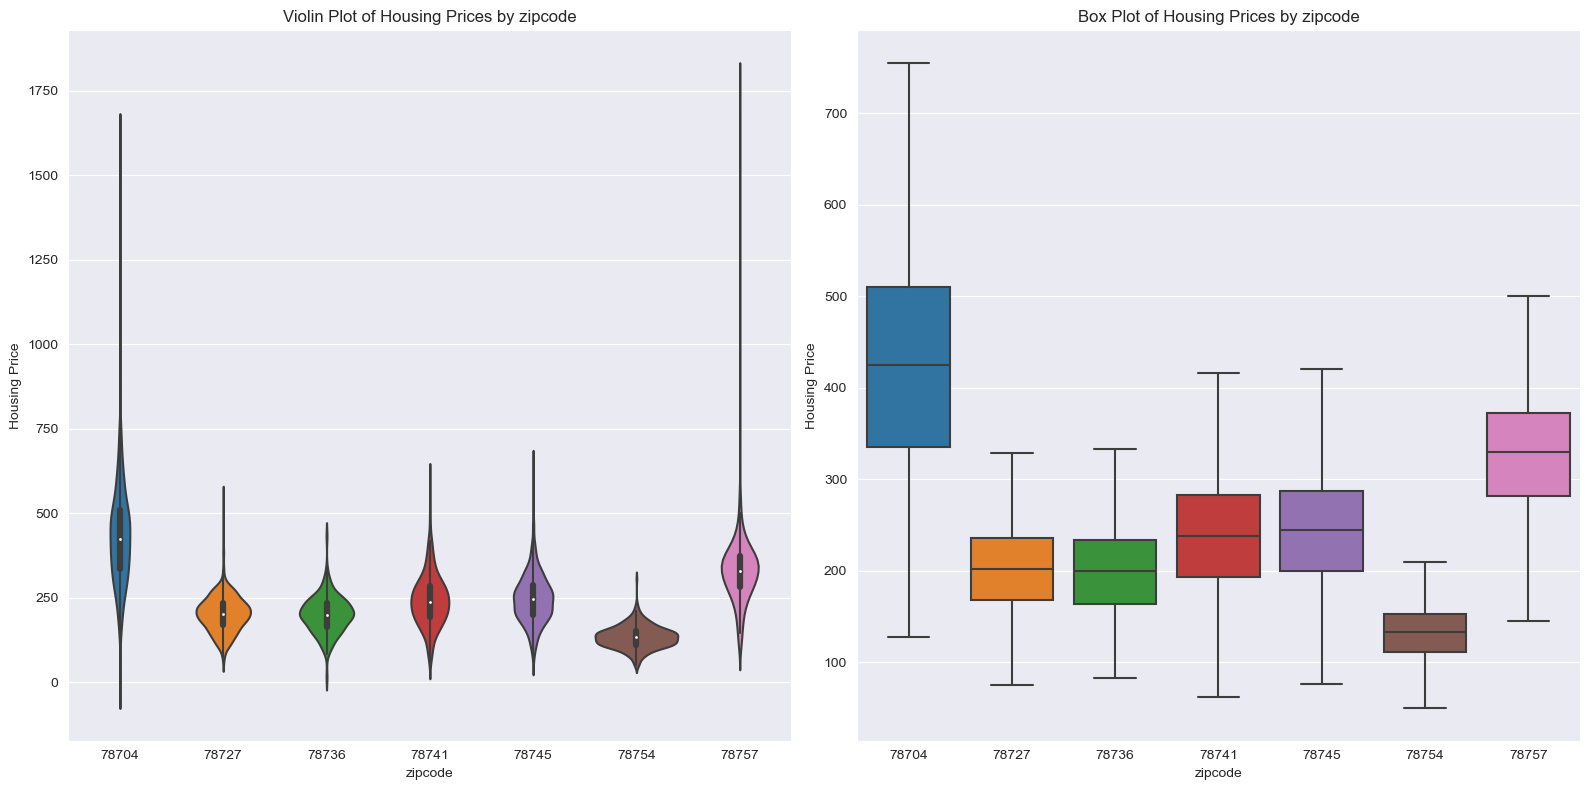

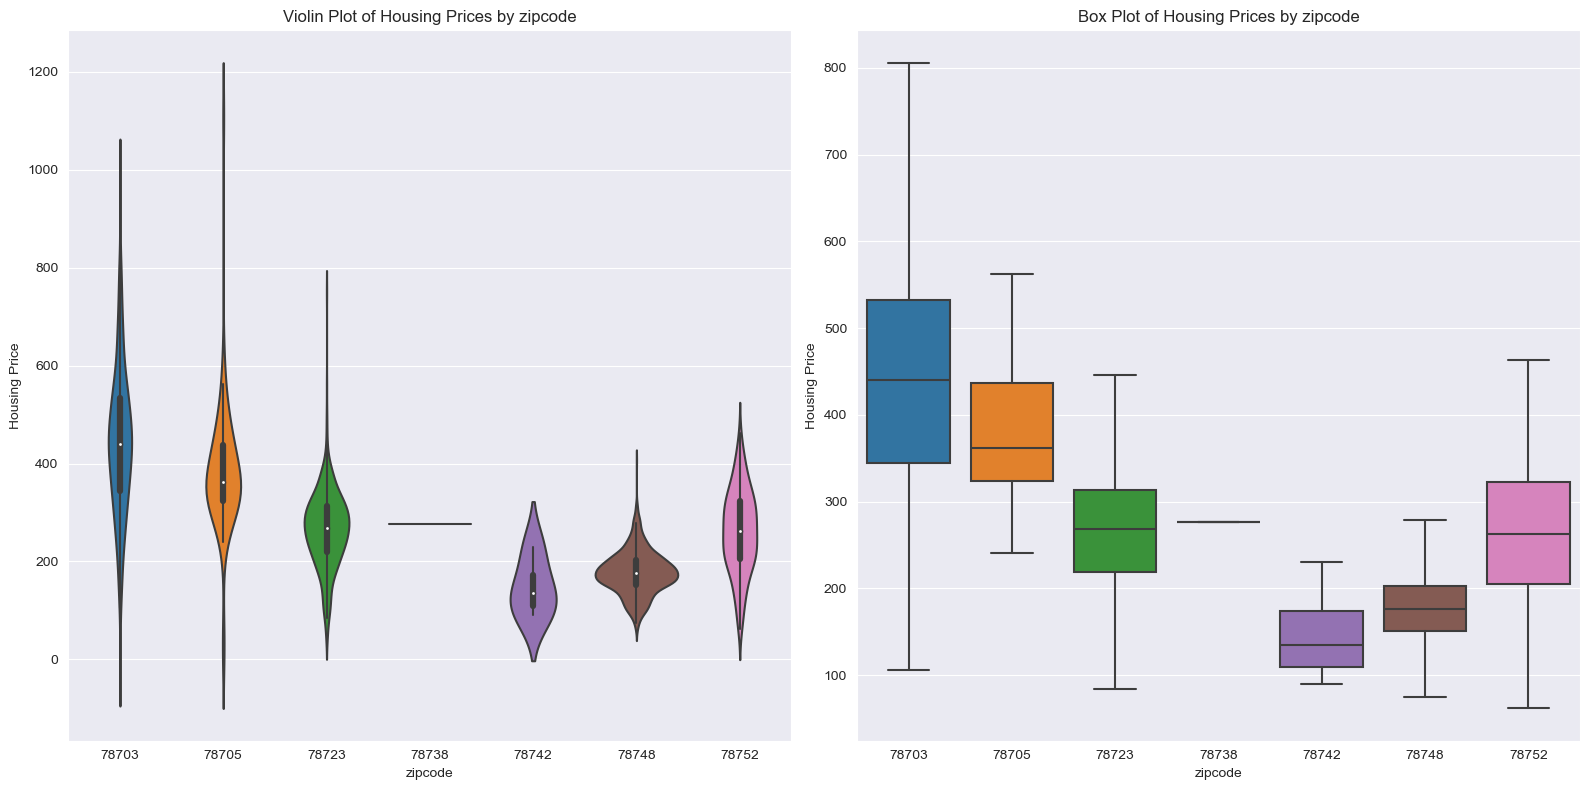

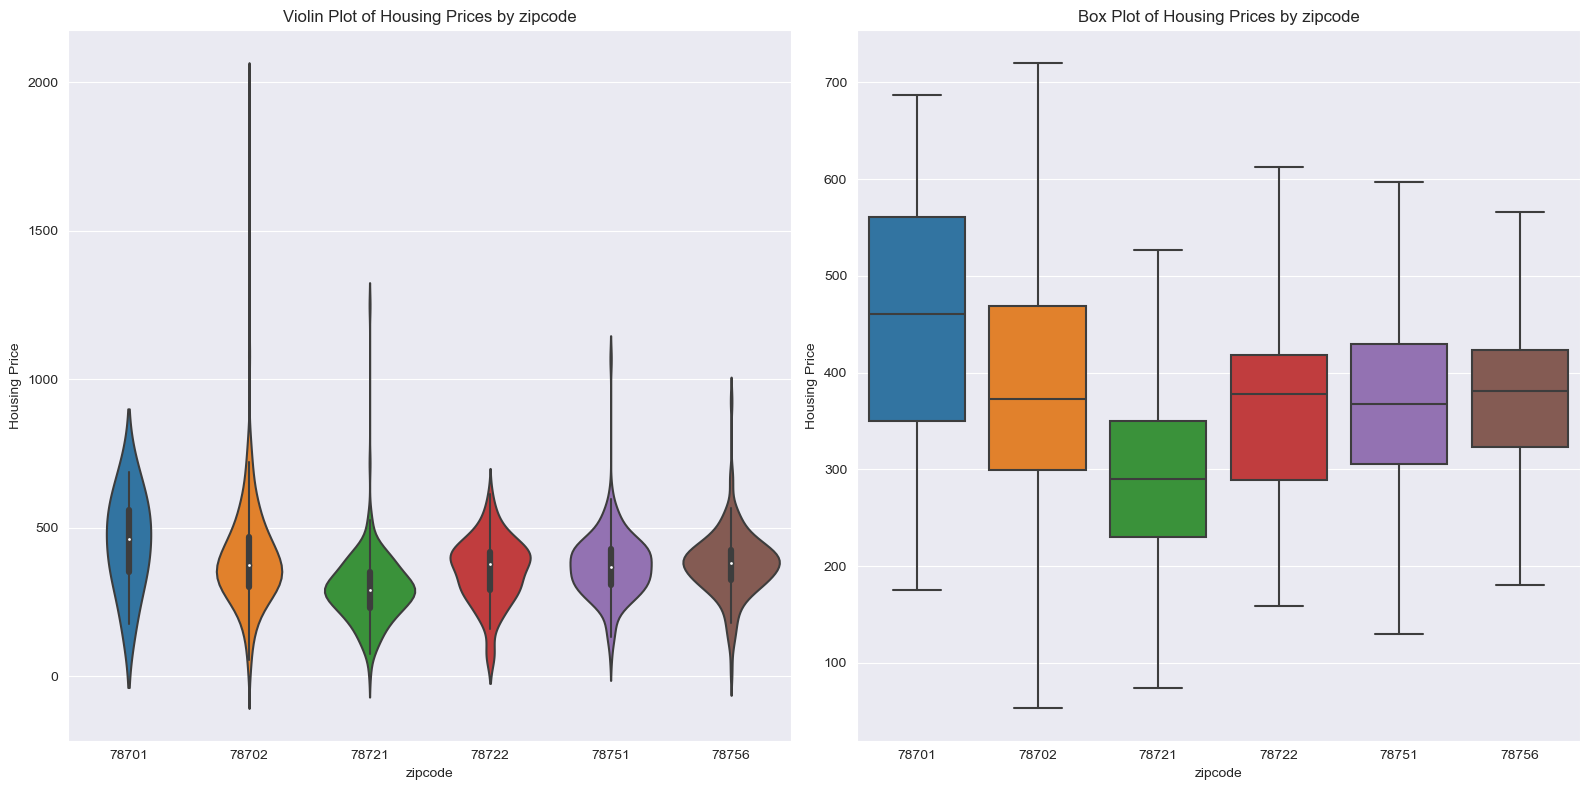

In [623]:
# First，Observe the relationship between  districts and price
# Get all unique zipcodes
all_zipcodes = house_df['zipcode'].unique()

# Set the number of zipcodes to display per plot
zipcodes_per_plot = 7

# Loop through the zipcodes, processing in batches of 'zipcodes_per_plot'
for i in range(0, len(all_zipcodes), zipcodes_per_plot):
    # Get the current batch of zipcodes
    current_zipcodes = all_zipcodes[i:i + zipcodes_per_plot]

    # Filter the dataframe to include only the current batch of zipcodes
    current_df = house_df[house_df['zipcode'].isin(current_zipcodes)]

    # Call the 'relation_plot' function to generate violin and box plots
    relation_plot(current_df, xdata="zipcode", ydata="price_per_sqft")


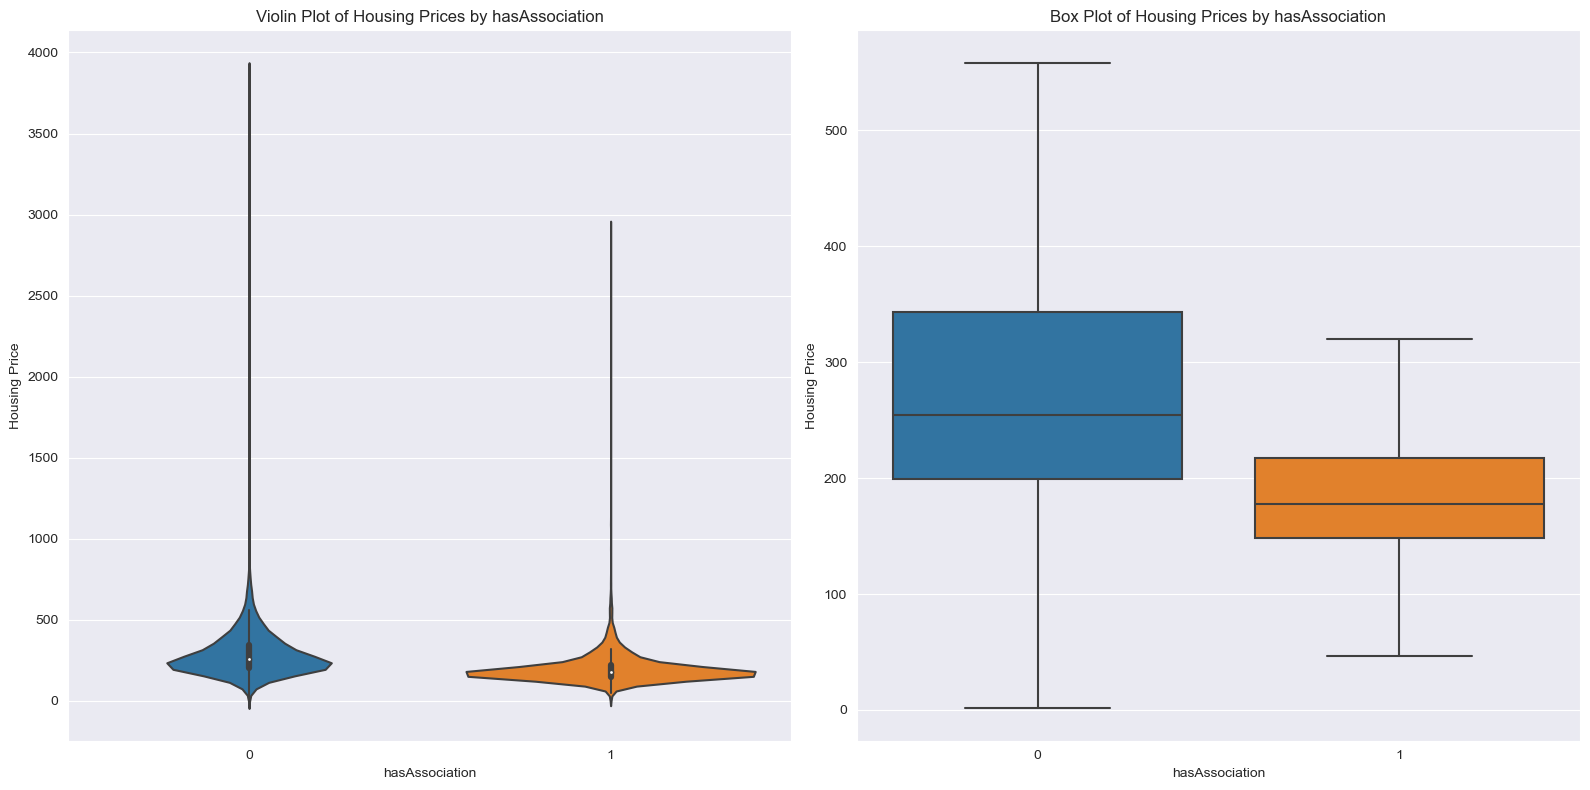

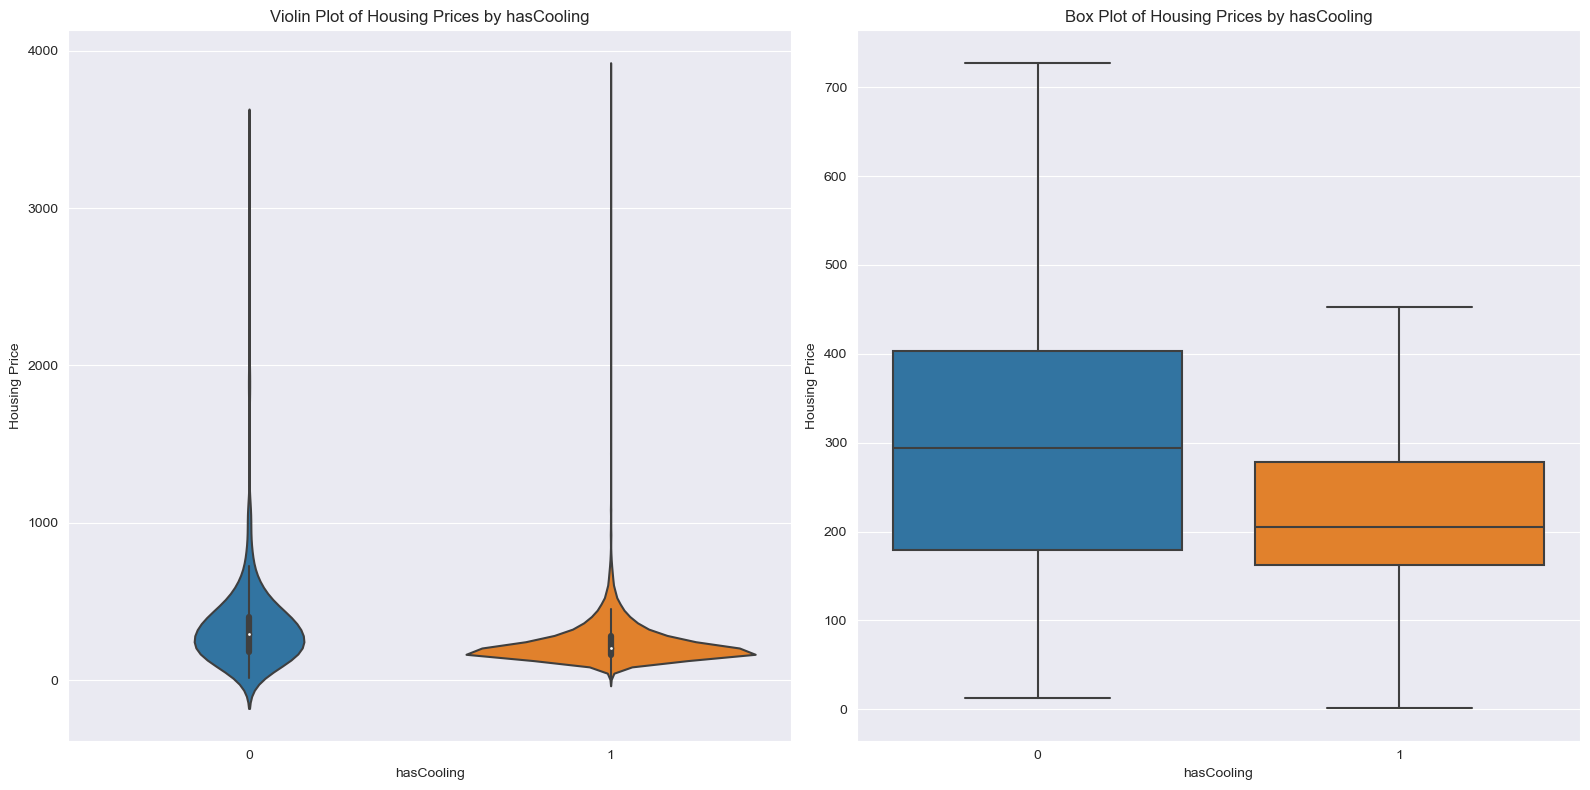

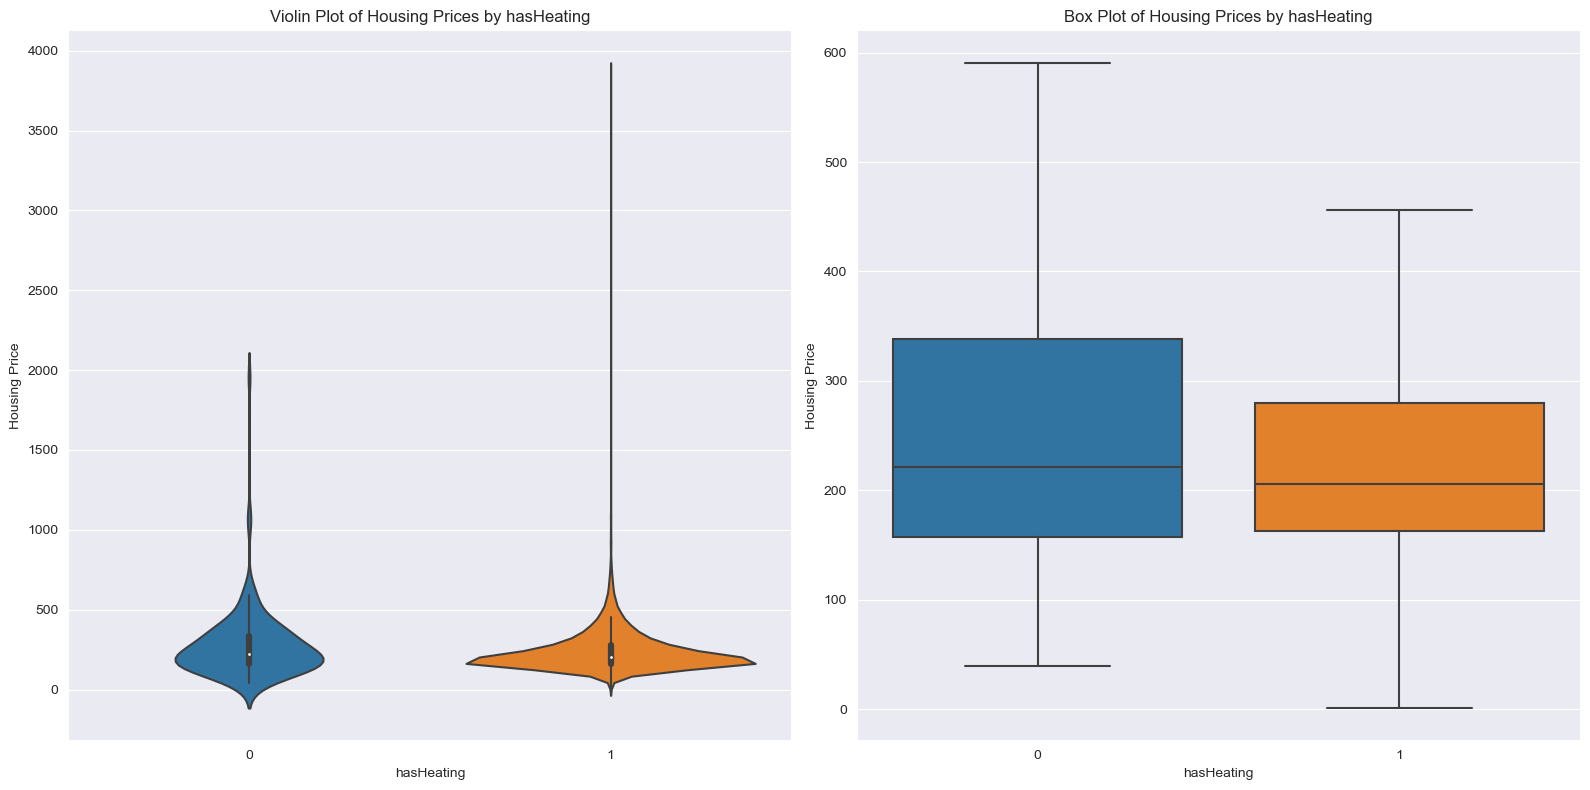

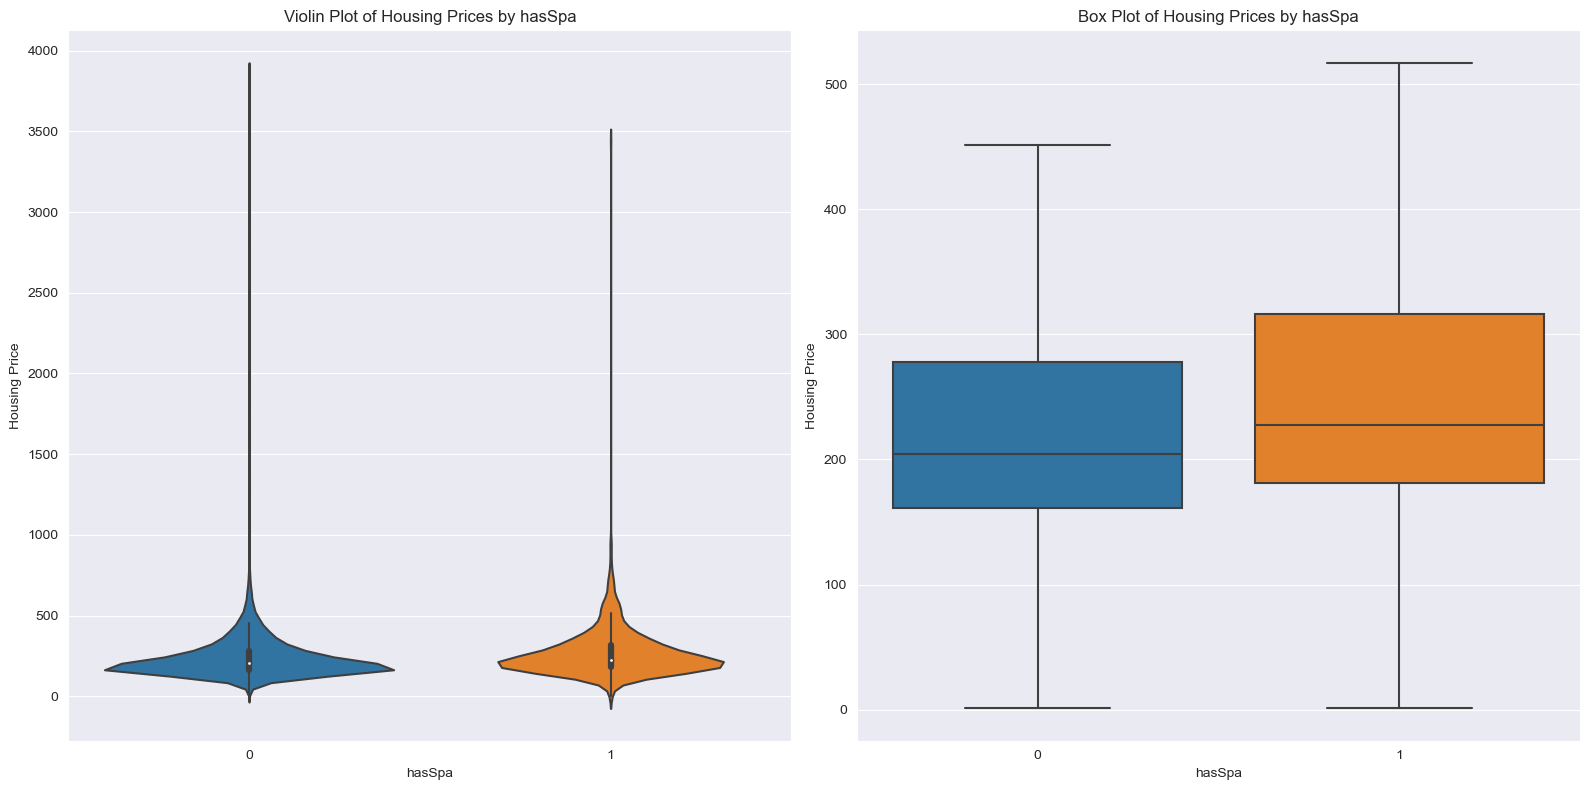

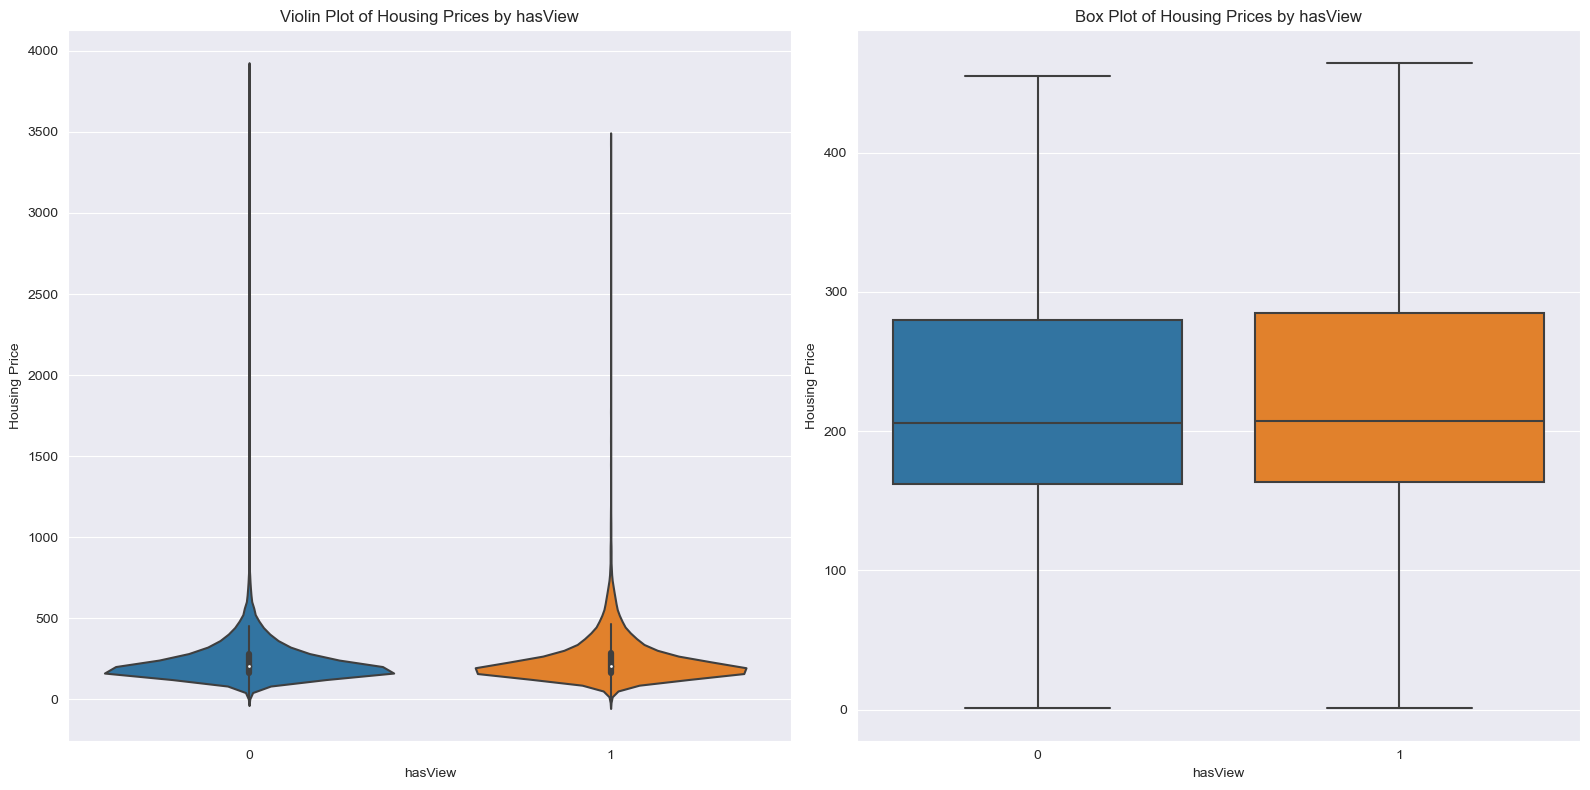

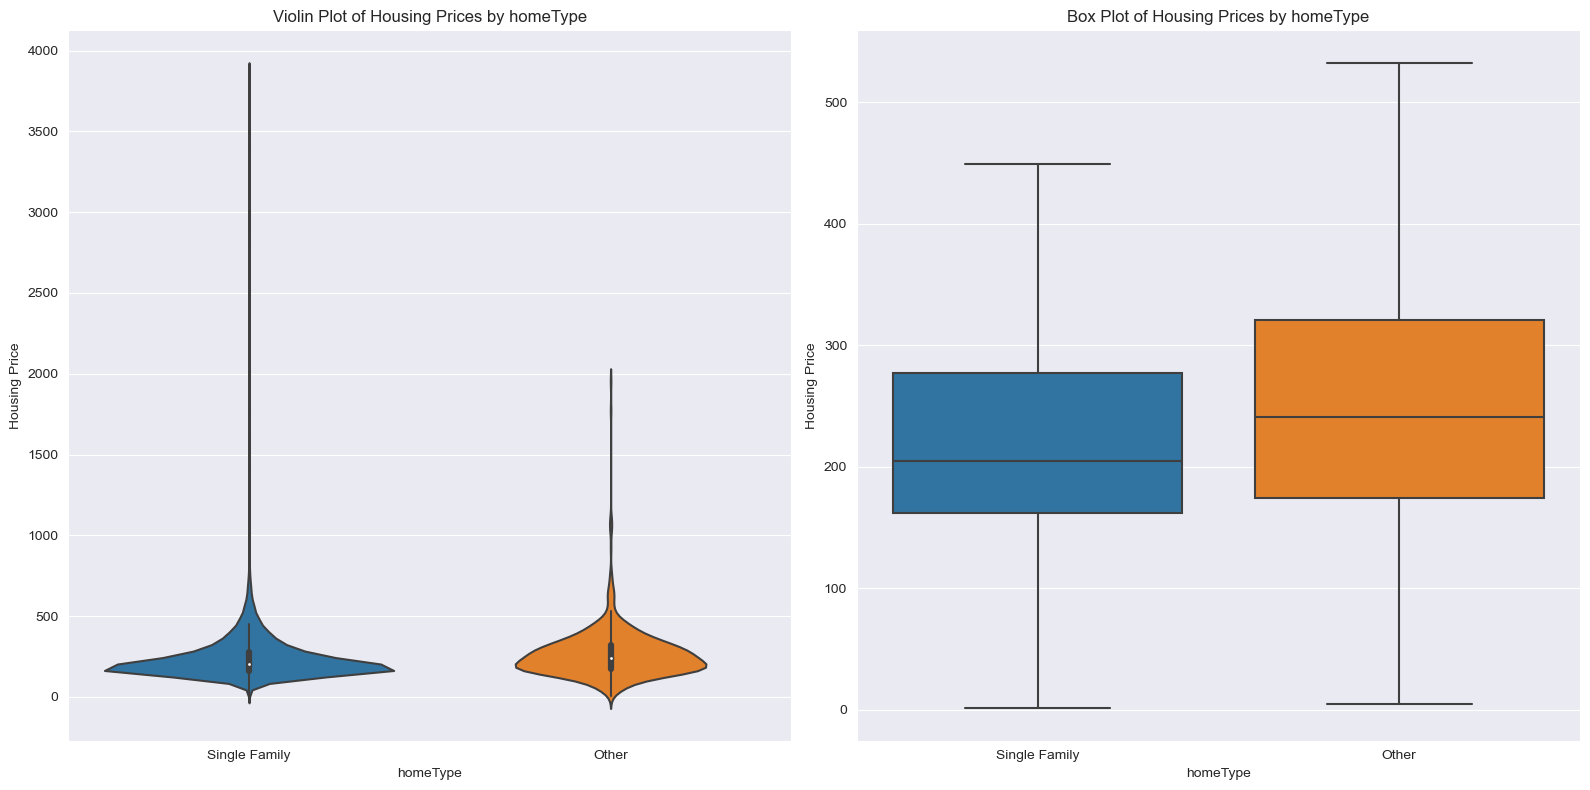

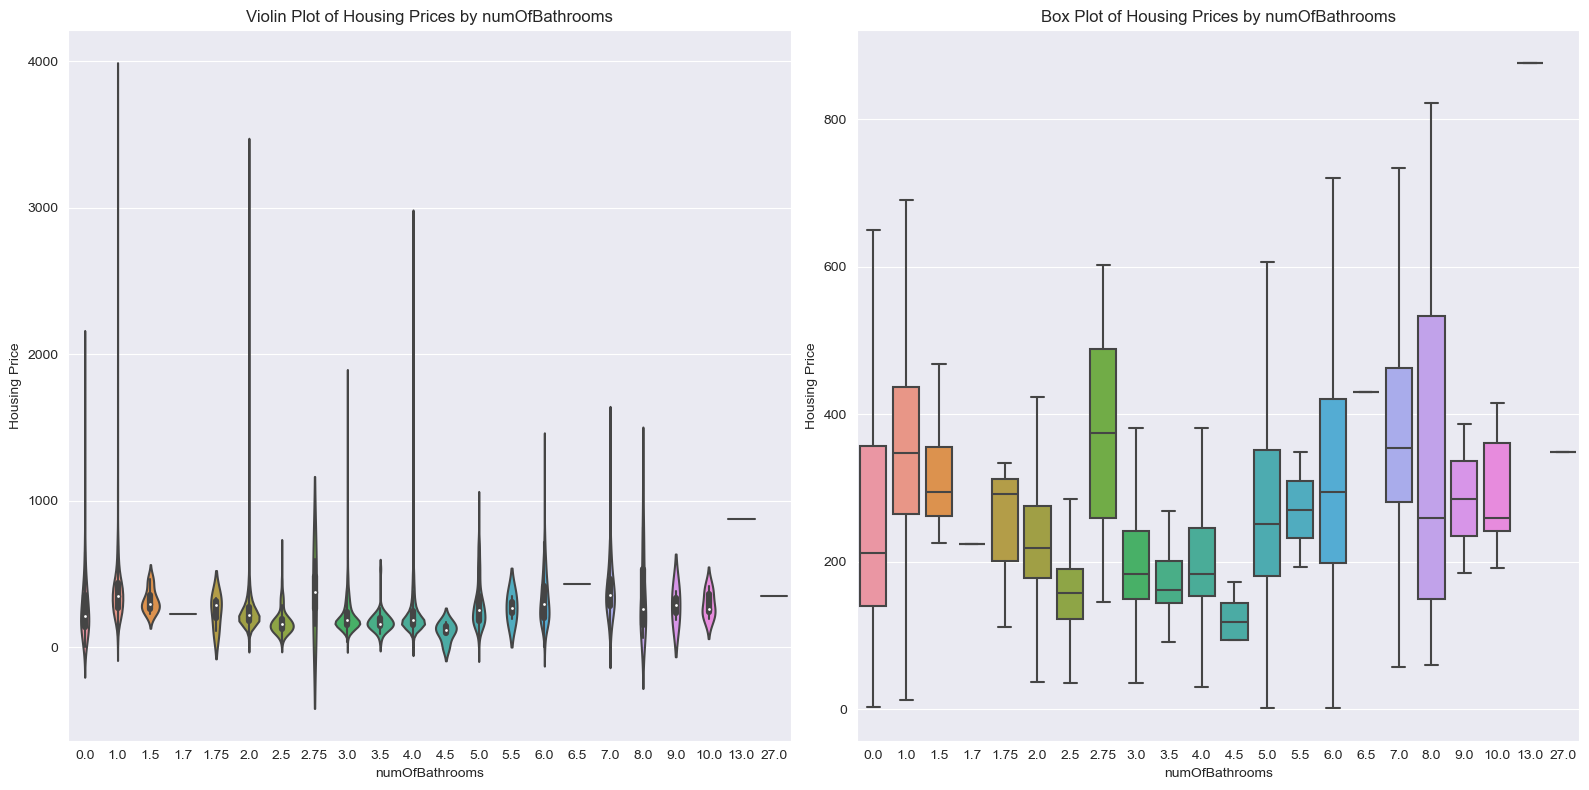

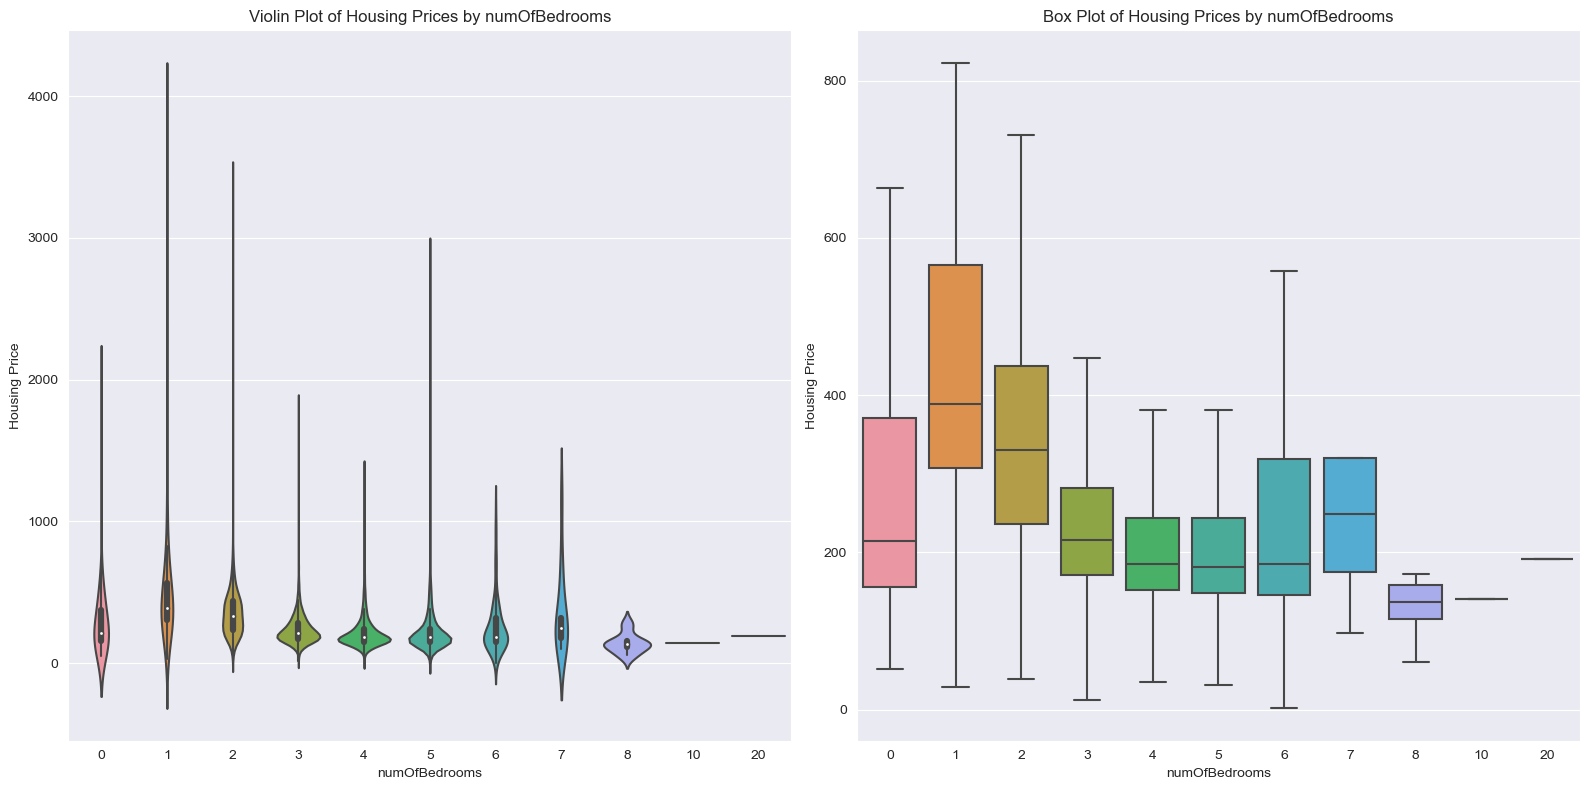

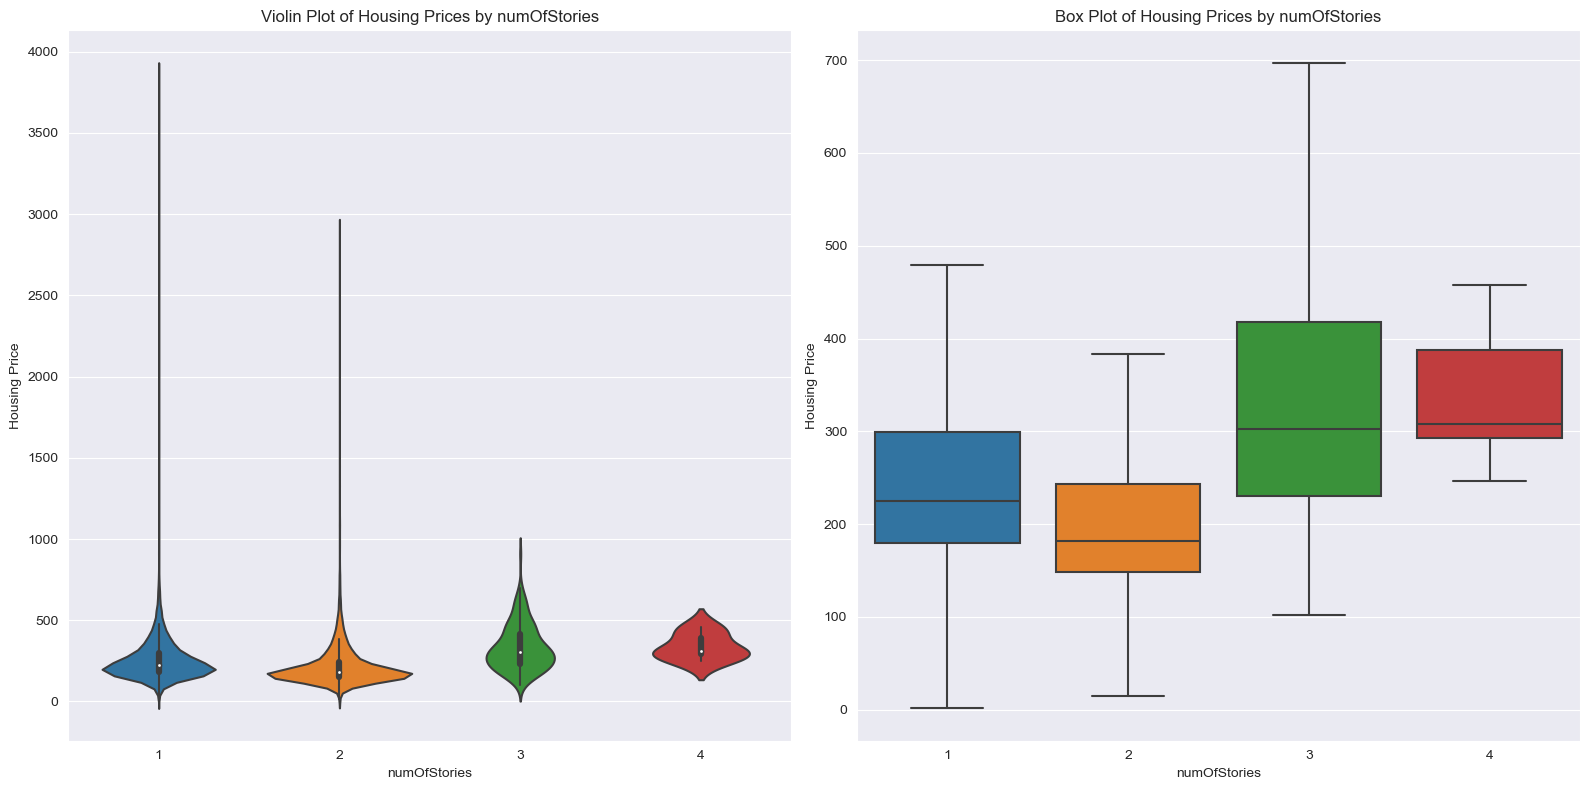

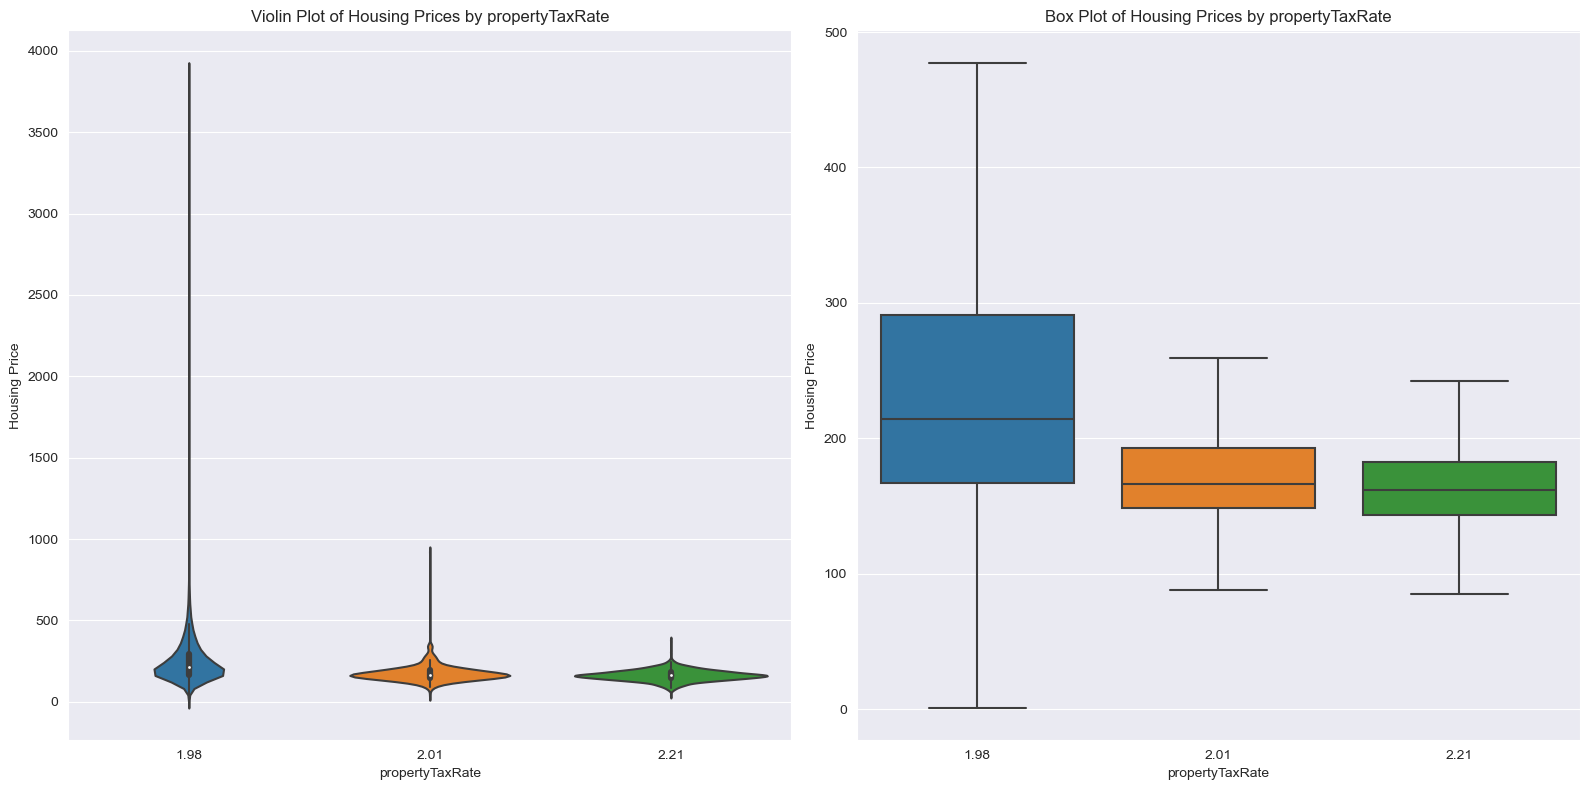

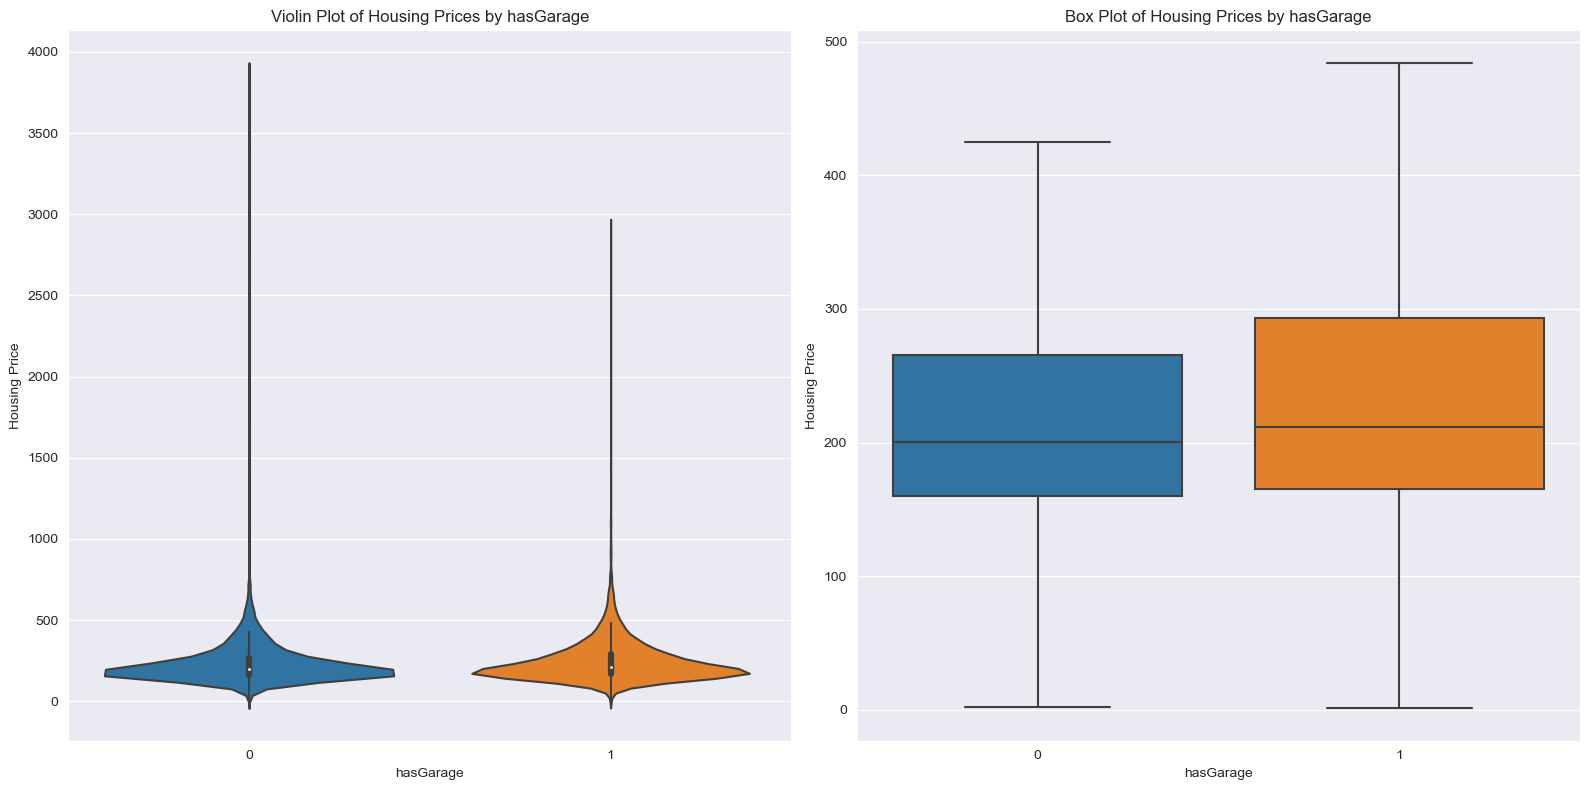

In [624]:
# Secondly, observe the relationship between internal factors of the house (floor level, number of bedrooms, number of rooms) and housing prices.
inter_factors = [
    'hasAssociation',
    'hasCooling',
    'hasHeating',
    'hasSpa',
    'hasView',
    'homeType',
    'numOfBathrooms',
    'numOfBedrooms',
    'numOfStories',
    'propertyTaxRate',
    'hasGarage'
]
df = house_df
price = 'price_per_sqft'

# Generate plots for internal factor
for col in inter_factors:
    relation_plot(df, col, price)

### Continuous Variable

In [625]:
# Define a function to calculate the person correlation coefficient and build scatter plot.
from scipy.stats import pearsonr
def continunous_factor_relation(df, xdata, ydata = 'price_per_sqft'):
    
    # Extract the price and area columns as arrays
    data1 = house_df[ydata].values
    data2 = house_df[xdata].values
    
    # Calculate Pearson correlation coefficient
    corr, p_value = pearsonr(data1, data2)
    
    print(f"Pearson correlation coefficient: {corr}")
    print(f"P-value: {p_value}")
    
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x=xdata, y=ydata)
    plt.title(f'Scatter Plot of Housing Price and {xdata}')
    plt.xlabel(f'{xdata}')
    plt.ylabel('Housing Price')
    plt.savefig(f'./outputs/Scatter_Plot_Housing_Price_and_{xdata}.png')
    plt.show()

Pearson correlation coefficient: 0.01624803275128254
P-value: 0.04536574022618247


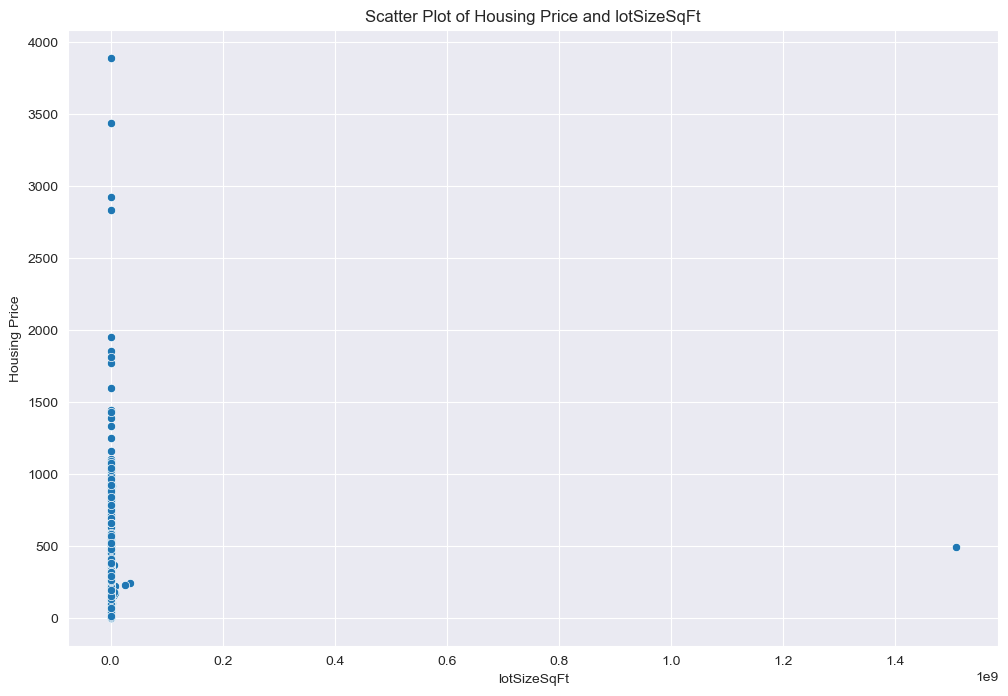

Pearson correlation coefficient: -0.07828003444483443
P-value: 4.644098028101138e-22


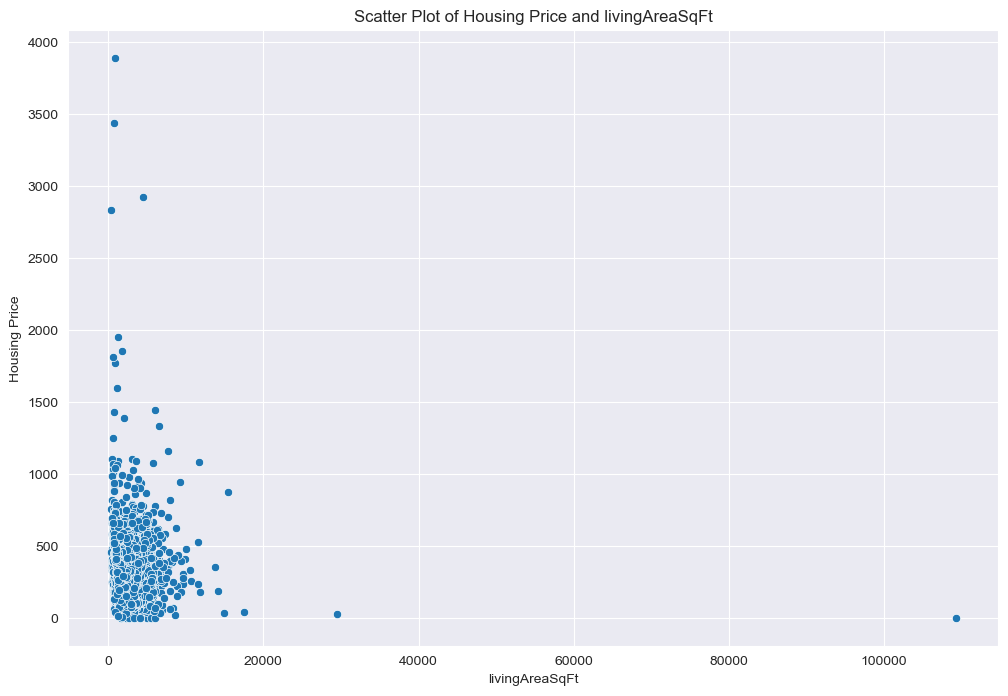

Pearson correlation coefficient: 0.3336010316176587
P-value: 0.0


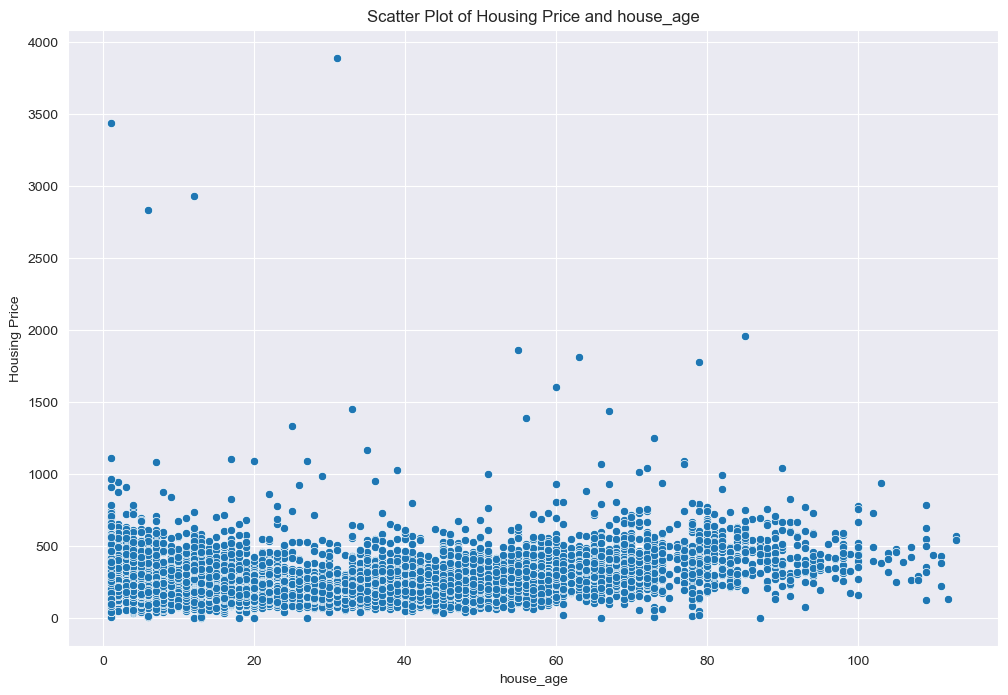

In [626]:
# Observe the continunous columns
continunous_columns = [
    'lotSizeSqFt', 
    'livingAreaSqFt', 
    'house_age'
]
ydata = 'price_per_sqft'
df = house_df

for col in continunous_columns:
    continunous_factor_relation(df, col, ydata)

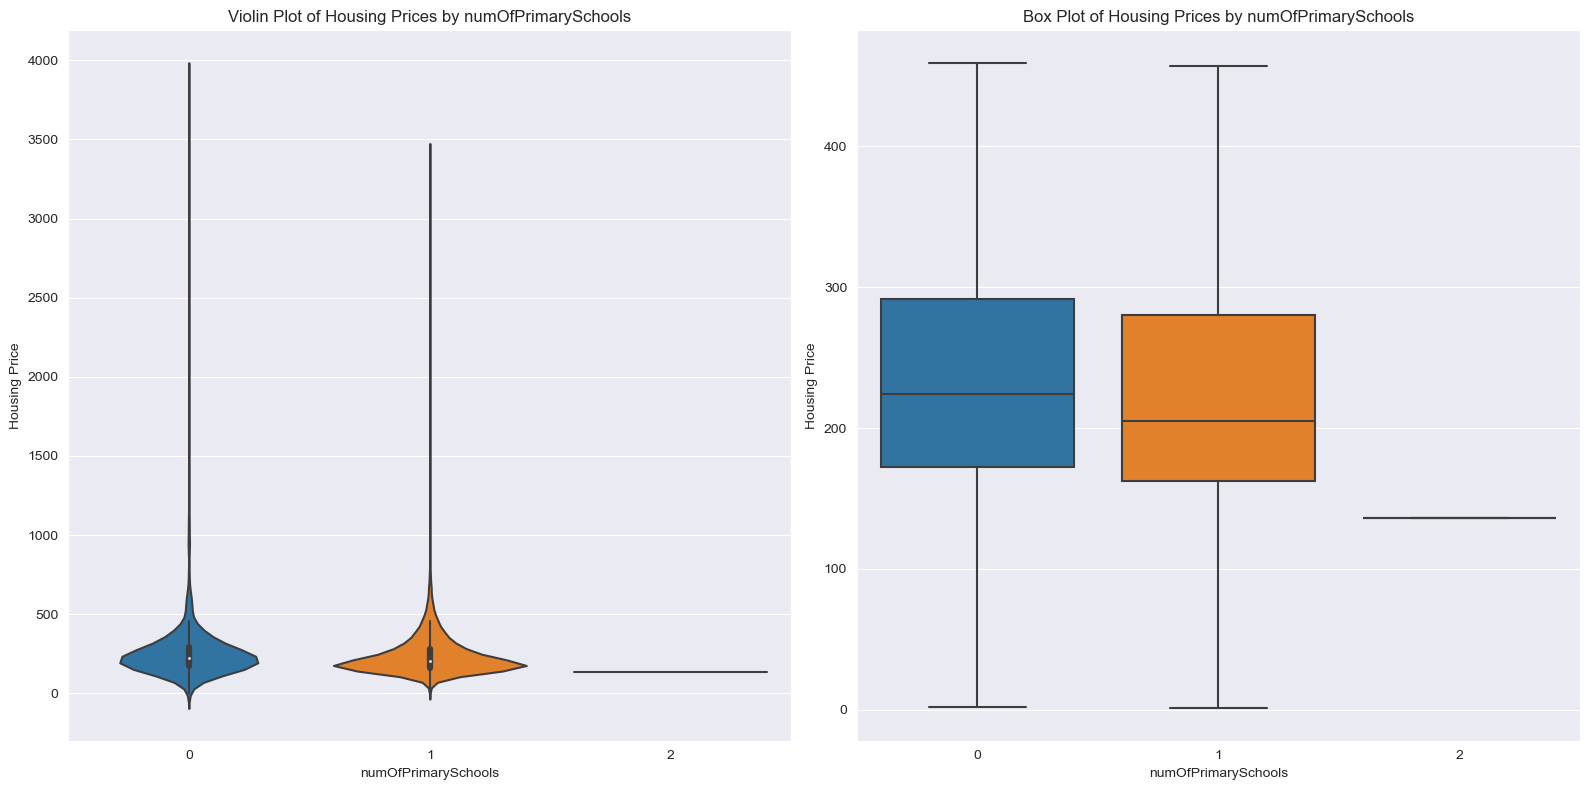

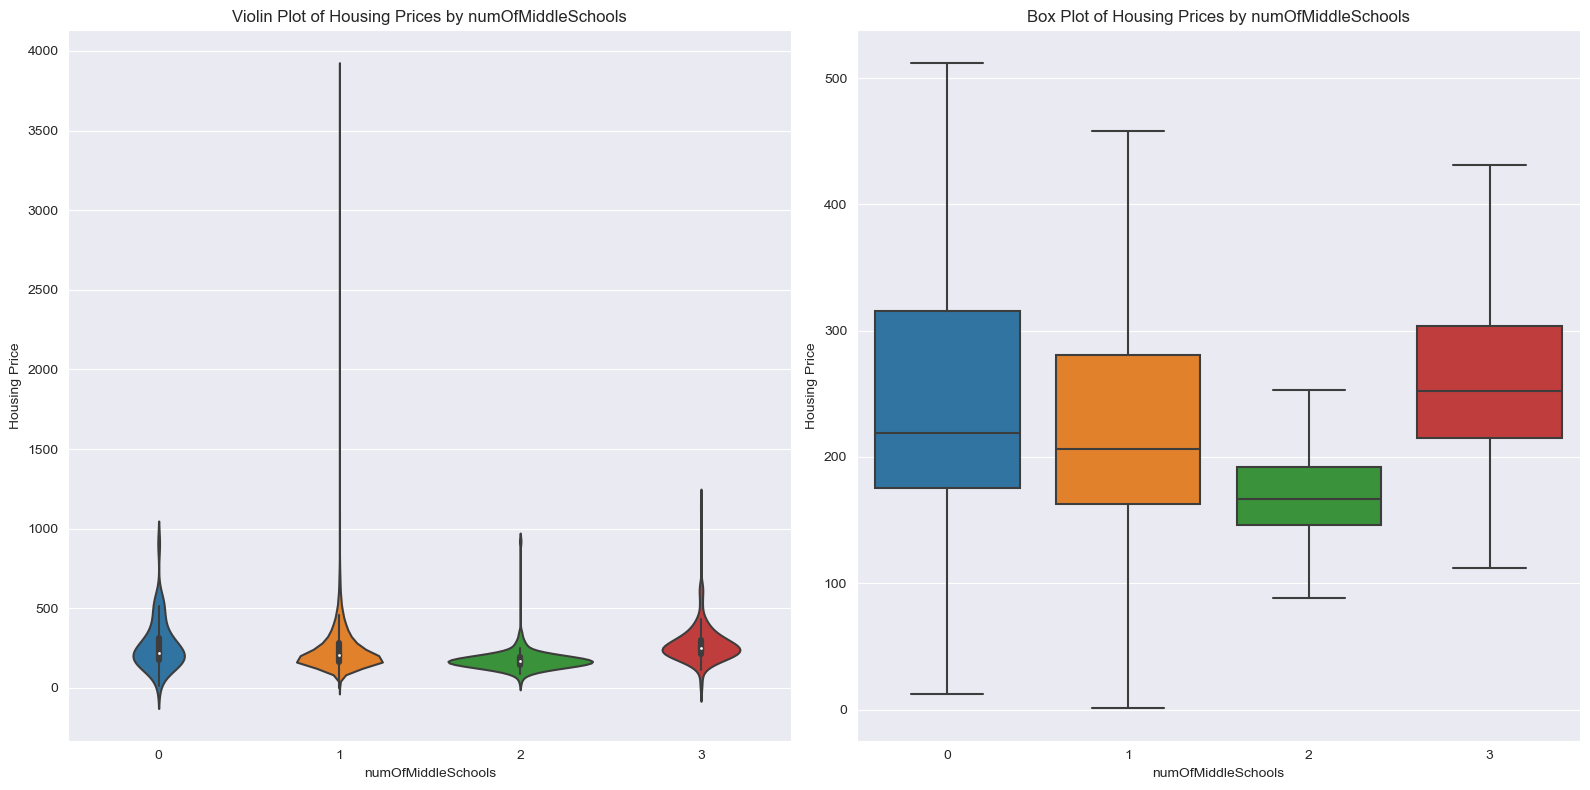

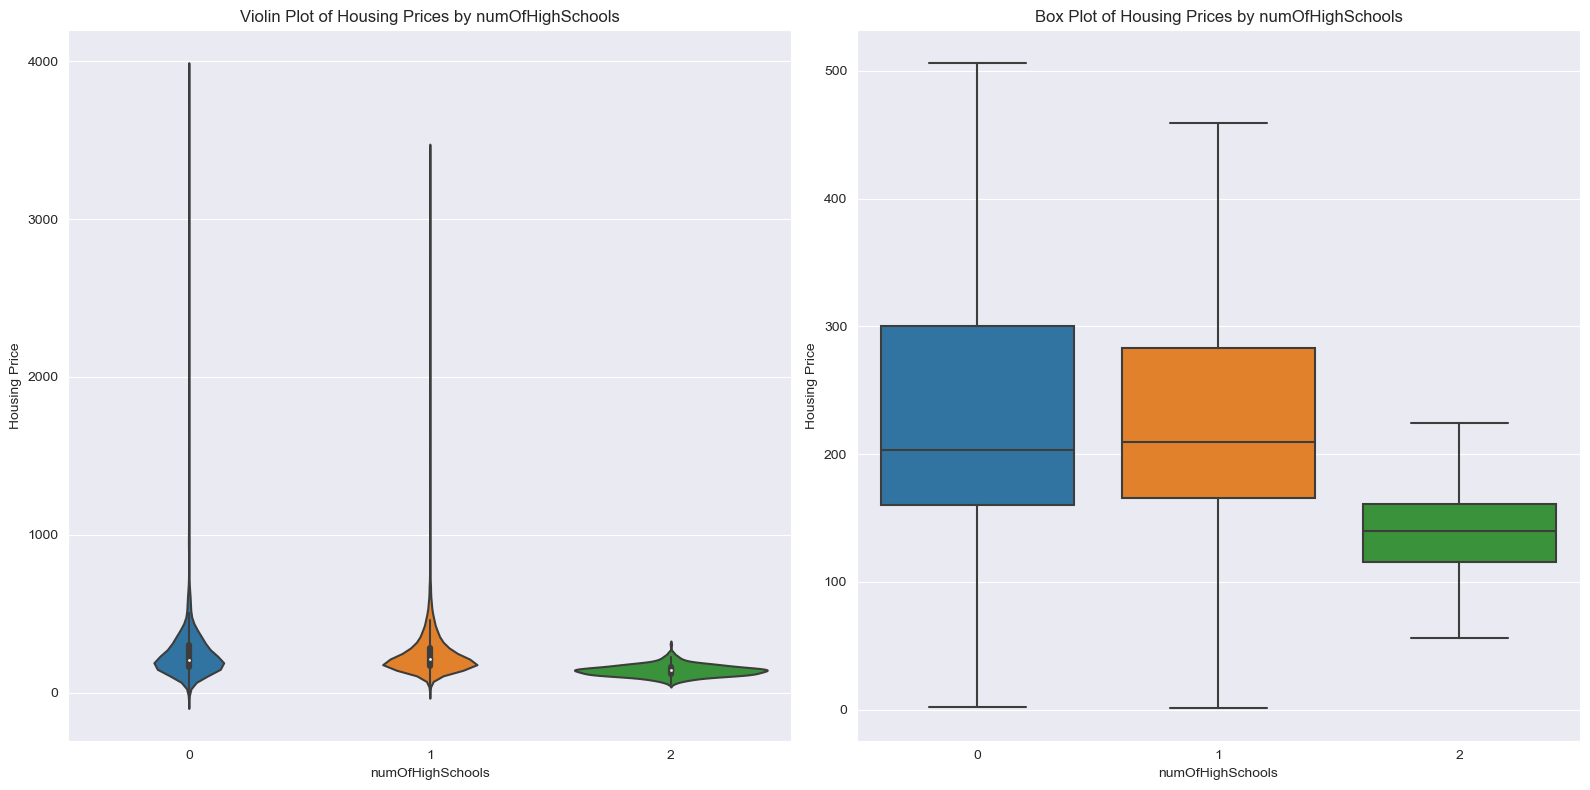

In [627]:
# Special Factors Analysis

# There are 6 variables about shchool, I will observe the relationship between these factors and price.

# Firstly, observe the category variables

school_category_factors = [
    'numOfPrimarySchools',
    'numOfMiddleSchools',
    'numOfHighSchools',
]

df = house_df
price = 'price_per_sqft'

# plot
for col in school_category_factors:
    relation_plot(df, col, price)

### Observation and Analysis:

• The violin plot shows that the distribution of housing prices under different school counts is very similar; although there are some variations, there is no obvious trend of price increase or decrease.

• The box plot also indicates that the range of housing prices overlaps across different school counts, suggesting that the number of schools does not have a significant impact on housing prices.

Based on these factors, consider consolidating the counts into a single "School Density Index" to further simplify the model.

In [628]:
# Create new column: schoolNum, combine these 3 factors
house_df['schoolNum'] = (house_df['numOfPrimarySchools'] +
                         house_df['numOfMiddleSchools'] +
                         house_df['numOfHighSchools'])

# Delete these 3 columns
house_df.drop(['numOfPrimarySchools', 'numOfMiddleSchools', 'numOfHighSchools'], axis=1, inplace=True)

# Review the DataFrame
house_df

,zipcode,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,lotSizeSqFt,...,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,price_per_sqft,house_age,avgSchoolDistance_new,schoolNum
0,78660,1.98,1,1,1,1,0,0,Single Family,6011.0,...,2.7,1063,14,3.0,4,2,117.26,7,Close,3
1,78660,1.98,1,1,1,1,0,0,Single Family,6185.0,...,2.7,1063,14,2.0,4,1,166.86,7,Close,3
2,78660,1.98,1,0,1,1,0,0,Single Family,7840.0,...,3.0,1108,14,2.0,3,1,173.29,1,Close,2
3,78660,1.98,1,1,1,1,0,0,Single Family,6098.0,...,2.7,1063,14,2.0,3,1,143.03,5,Close,3
4,78660,1.98,1,0,1,1,0,0,Single Family,6708.0,...,4.0,1223,14,3.0,3,2,112.52,16,Close,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,0,1,1,1,0,1,Single Family,6534.0,...,3.3,1424,14,2.0,3,1,267.42,34,Very_Close,3
15167,78741,1.98,1,1,1,1,1,1,Single Family,2439.0,...,6.7,1226,16,4.0,3,3,291.31,4,Close,3
15168,78704,1.98,0,1,1,1,0,0,Single Family,9408.0,...,5.0,889,13,3.0,3,2,574.15,85,Very_Close,3
15169,78722,1.98,0,0,1,1,0,0,Other,6098.0,...,6.7,1057,15,2.0,4,1,69.22,51,Close,3


Pearson correlation coefficient: 0.03628899411685476
P-value: 7.791229960837342e-06


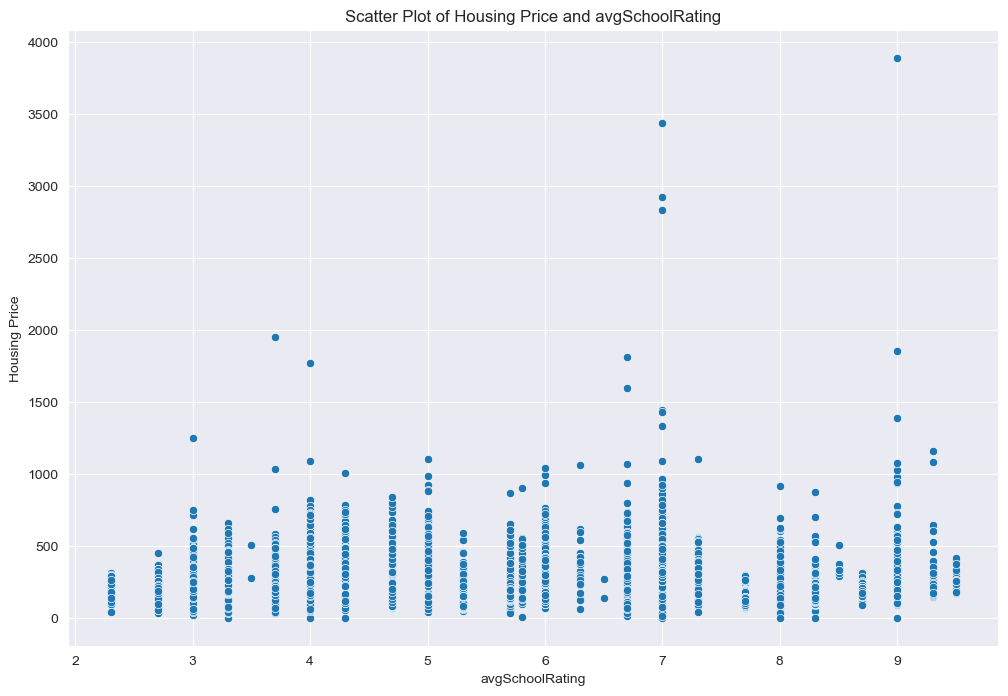

Pearson correlation coefficient: -0.21502412934095655
P-value: 3.550057572164546e-158


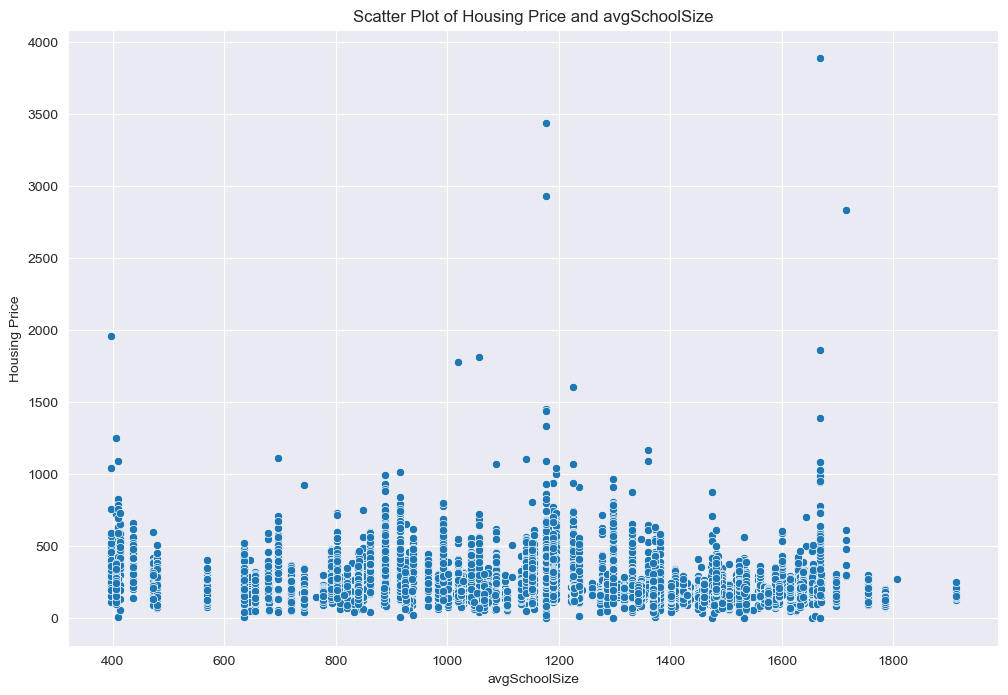

Pearson correlation coefficient: -0.02158392580471607
P-value: 0.007846699026966001


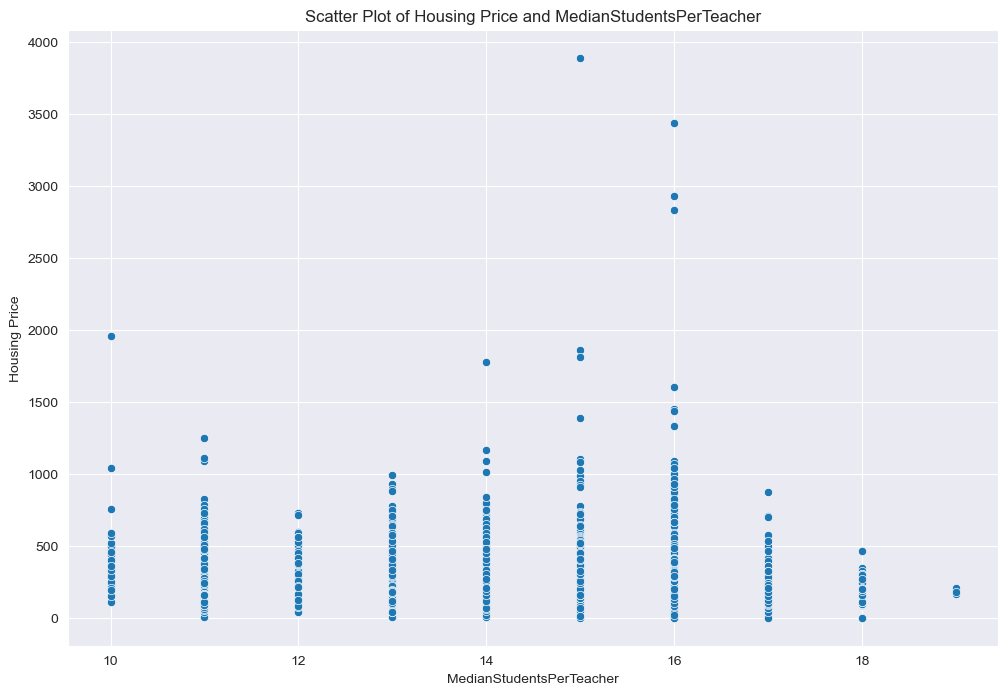

In [629]:
# Secondly, Observe the continuous variables
school_continunous_columns = [
    'avgSchoolRating',
    'avgSchoolSize',
    'MedianStudentsPerTeacher'
]
ydata = 'price_per_sqft'
df = house_df

for col in school_continunous_columns:
    continunous_factor_relation(df, col, ydata)

### Observation and Analysis:

#### Pearson coefficient:

- **∣r∣=1**: Perfect linear relationship. All data points lie exactly on a straight line.
- **0.7≤∣r∣<1**: Strong linear relationship. Data points are close to the line with small deviations.
- **0.3≤∣r∣<0.7**: Moderate linear relationship. Data points are slightly scattered but still show a trend.
- **0≤∣r∣<0.3**: Weak linear relationship. Data points are widely distributed with almost no linear trend.
- **r=0**: No linear relationship. Data points do not follow any obvious linear pattern.

#### Solution:
The three continuous variables show weak correlation with housing prices, so `avgSchoolSize` and `MedianStudentsPerTeacher` were removed, retaining `avgSchoolRating`.

#### Reason:
Although the correlation is weak, from a real estate perspective, school ratings are typically an important factor in property valuation.

In [630]:
house_df.drop(['avgSchoolSize', 'MedianStudentsPerTeacher'], axis=1, inplace=True)

# Review
house_df

,zipcode,propertyTaxRate,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,lotSizeSqFt,livingAreaSqFt,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,price_per_sqft,house_age,avgSchoolDistance_new,schoolNum
0,78660,1.98,1,1,1,1,0,0,Single Family,6011.0,2601,2.7,3.0,4,2,117.26,7,Close,3
1,78660,1.98,1,1,1,1,0,0,Single Family,6185.0,1768,2.7,2.0,4,1,166.86,7,Close,3
2,78660,1.98,1,0,1,1,0,0,Single Family,7840.0,1478,3.0,2.0,3,1,173.29,1,Close,2
3,78660,1.98,1,1,1,1,0,0,Single Family,6098.0,1678,2.7,2.0,3,1,143.03,5,Close,3
4,78660,1.98,1,0,1,1,0,0,Single Family,6708.0,2132,4.0,3.0,3,2,112.52,16,Close,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,1.98,0,1,1,1,0,1,Single Family,6534.0,1234,3.3,2.0,3,1,267.42,34,Very_Close,3
15167,78741,1.98,1,1,1,1,1,1,Single Family,2439.0,1888,6.7,4.0,3,3,291.31,4,Close,3
15168,78704,1.98,0,1,1,1,0,0,Single Family,9408.0,1524,5.0,3.0,3,2,574.15,85,Very_Close,3
15169,78722,1.98,0,0,1,1,0,0,Other,6098.0,6068,6.7,2.0,4,1,69.22,51,Close,3


In [631]:
# Due to the significant right skew in the price distribution of the original dataset, I took the logarithm for these metrics.

# Take the logarithm
house_df['lotSizeSqFt_ln'] = np.log(house_df['lotSizeSqFt'])
house_df['livingAreaSqFt_ln'] = np.log(house_df['livingAreaSqFt'])
house_df['propertyTaxRate_ln'] = np.log(house_df['propertyTaxRate'])
house_df['house_age_ln'] = np.log(house_df['house_age'])
house_df['price_per_sqft_ln'] = np.log(house_df['price_per_sqft'])
house_df['schoolNum_ln'] = np.log(house_df['schoolNum'])
house_df['numOfBathrooms_ln'] = np.log(house_df['numOfBathrooms'])
house_df['numOfBedrooms_ln'] = np.log(house_df['numOfBedrooms'])
house_df['numOfStories_ln'] = np.log(house_df['numOfStories'])

# Delete these original columns
del_columns = [
    'lotSizeSqFt',
    'livingAreaSqFt',
    'propertyTaxRate',
    'house_age',
    'schoolNum',
    'numOfBathrooms',
    'numOfBedrooms',
    'numOfStories'
]

house_df.drop(columns=del_columns, inplace=True)

#review
house_df

,zipcode,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,avgSchoolRating,price_per_sqft,avgSchoolDistance_new,lotSizeSqFt_ln,livingAreaSqFt_ln,propertyTaxRate_ln,house_age_ln,price_per_sqft_ln,schoolNum_ln,numOfBathrooms_ln,numOfBedrooms_ln,numOfStories_ln
0,78660,1,1,1,1,0,0,Single Family,2.7,117.26,Close,8.701346,7.863651,0.683097,1.945910,4.764394,1.098612,1.098612,1.386294,0.693147
1,78660,1,1,1,1,0,0,Single Family,2.7,166.86,Close,8.729882,7.477604,0.683097,1.945910,5.117155,1.098612,0.693147,1.386294,0.000000
2,78660,1,0,1,1,0,0,Single Family,3.0,173.29,Close,8.966994,7.298445,0.683097,0.000000,5.154966,0.693147,0.693147,1.098612,0.000000
3,78660,1,1,1,1,0,0,Single Family,2.7,143.03,Close,8.715716,7.425358,0.683097,1.609438,4.963054,1.098612,0.693147,1.098612,0.000000
4,78660,1,0,1,1,0,0,Single Family,4.0,112.52,Close,8.811056,7.664816,0.683097,2.772589,4.723131,1.098612,1.098612,1.098612,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,78748,0,1,1,1,0,1,Single Family,3.3,267.42,Very_Close,8.784775,7.118016,0.683097,3.526361,5.588820,1.098612,0.693147,1.098612,0.000000
15167,78741,1,1,1,1,1,1,Single Family,6.7,291.31,Close,7.799343,7.543273,0.683097,1.386294,5.674388,1.098612,1.386294,1.098612,1.098612
15168,78704,0,1,1,1,0,0,Single Family,5.0,574.15,Very_Close,9.149316,7.329094,0.683097,4.442651,6.352891,1.098612,1.098612,1.098612,0.693147
15169,78722,0,0,1,1,0,0,Other,6.7,69.22,Close,8.715716,8.710784,0.683097,3.931826,4.237290,1.098612,0.693147,1.386294,0.000000


In [632]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   zipcode                15171 non-null  int64   
 1   hasAssociation         15171 non-null  int64   
 2   hasGarage              15171 non-null  int64   
 3   hasCooling             15171 non-null  int64   
 4   hasHeating             15171 non-null  int64   
 5   hasSpa                 15171 non-null  int64   
 6   hasView                15171 non-null  int64   
 7   homeType               15171 non-null  object  
 8   avgSchoolRating        15171 non-null  float64 
 9   price_per_sqft         15171 non-null  float64 
 10  avgSchoolDistance_new  15171 non-null  category
 11  lotSizeSqFt_ln         15171 non-null  float64 
 12  livingAreaSqFt_ln      15171 non-null  float64 
 13  propertyTaxRate_ln     15171 non-null  float64 
 14  house_age_ln           15171 non-null 

In [633]:
# Check for positive and negative infinity
log_columns = [
    'livingAreaSqFt_ln',
    'lotSizeSqFt_ln',
    'propertyTaxRate_ln',
    'house_age_ln',
    'price_per_sqft_ln',
    'schoolNum_ln',
    'numOfBathrooms_ln',
    'numOfBedrooms_ln',
    'numOfStories_ln'
]

inf_values = house_df[log_columns].isin([np.inf, -np.inf]).sum()

print(inf_values)

livingAreaSqFt_ln       0
lotSizeSqFt_ln          0
propertyTaxRate_ln      0
house_age_ln            0
price_per_sqft_ln       0
schoolNum_ln           51
numOfBathrooms_ln     125
numOfBedrooms_ln       47
numOfStories_ln         0
dtype: int64


In [634]:
# Filter out rows with inf values
house_df = house_df[np.isfinite(house_df['schoolNum_ln'])]

house_df = house_df[np.isfinite(house_df['numOfBathrooms_ln'])]

house_df = house_df[np.isfinite(house_df['numOfBedrooms_ln'])]

# Review the results
inf_values = house_df[log_columns].isin([np.inf, -np.inf]).sum()
print(inf_values)

livingAreaSqFt_ln     0
lotSizeSqFt_ln        0
propertyTaxRate_ln    0
house_age_ln          0
price_per_sqft_ln     0
schoolNum_ln          0
numOfBathrooms_ln     0
numOfBedrooms_ln      0
numOfStories_ln       0
dtype: int64


In [635]:
house_log_df = house_df.copy()
house_log_df.shape

(14983, 20)

Pearson correlation coefficient: -0.22378867691849424
P-value: 2.1075993578497467e-169


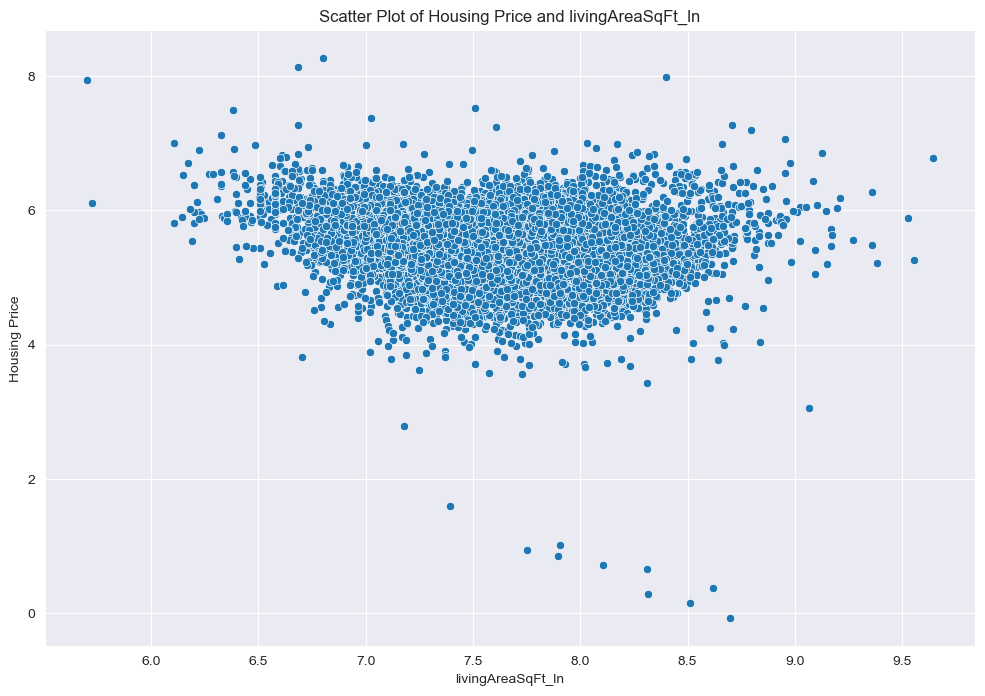

Pearson correlation coefficient: 0.06133375597300657
P-value: 5.734300286859579e-14


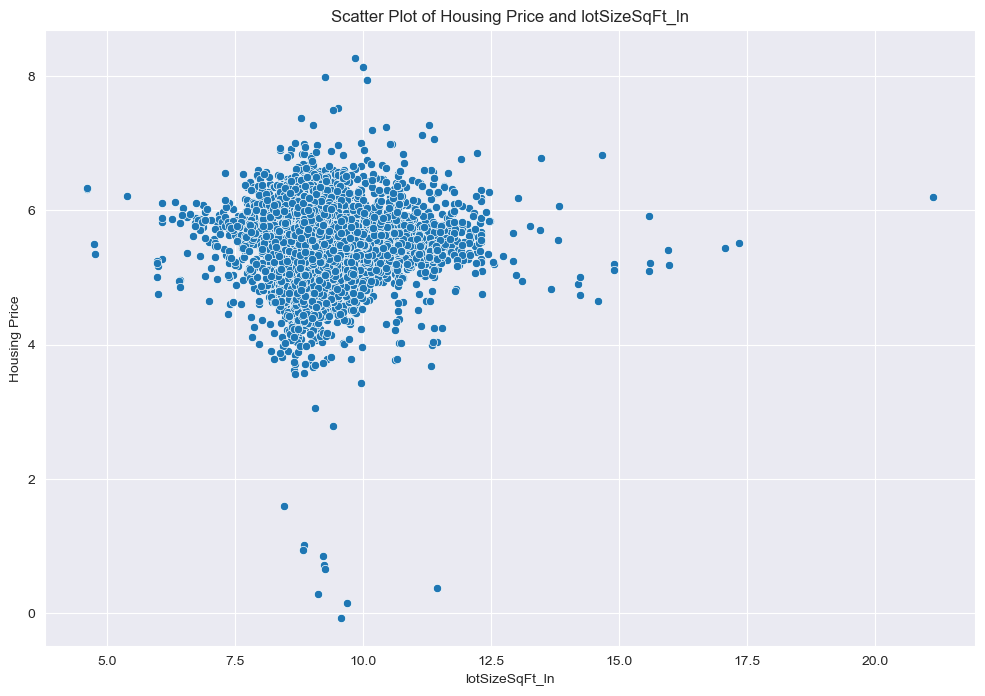

Pearson correlation coefficient: -0.17486868778379255
P-value: 3.480558089154891e-103


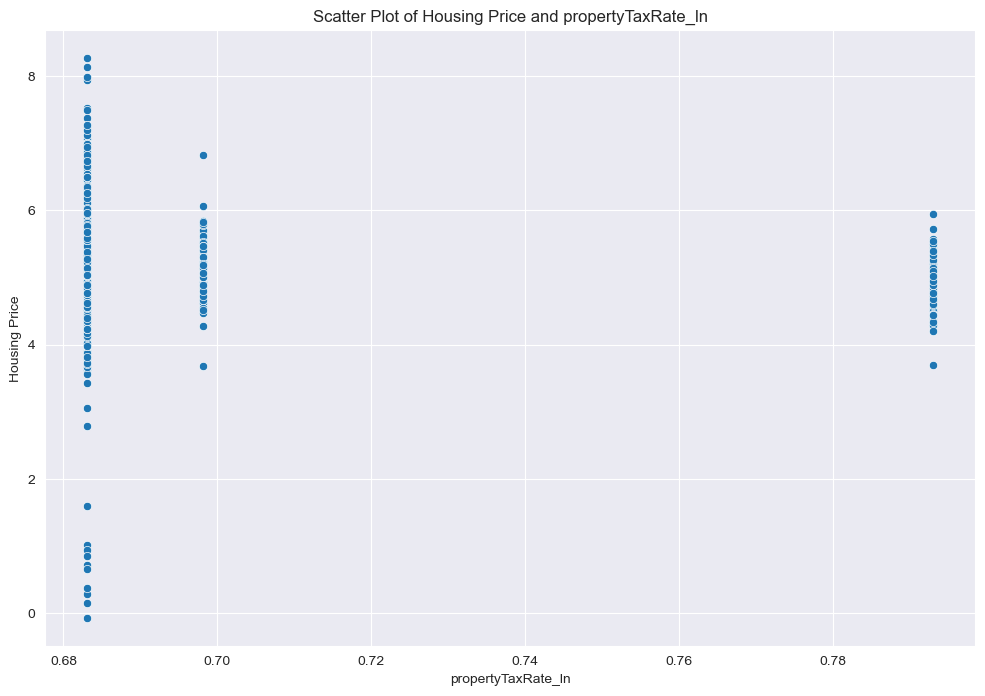

Pearson correlation coefficient: 0.16773079909621053
P-value: 5.6948064886265843e-95


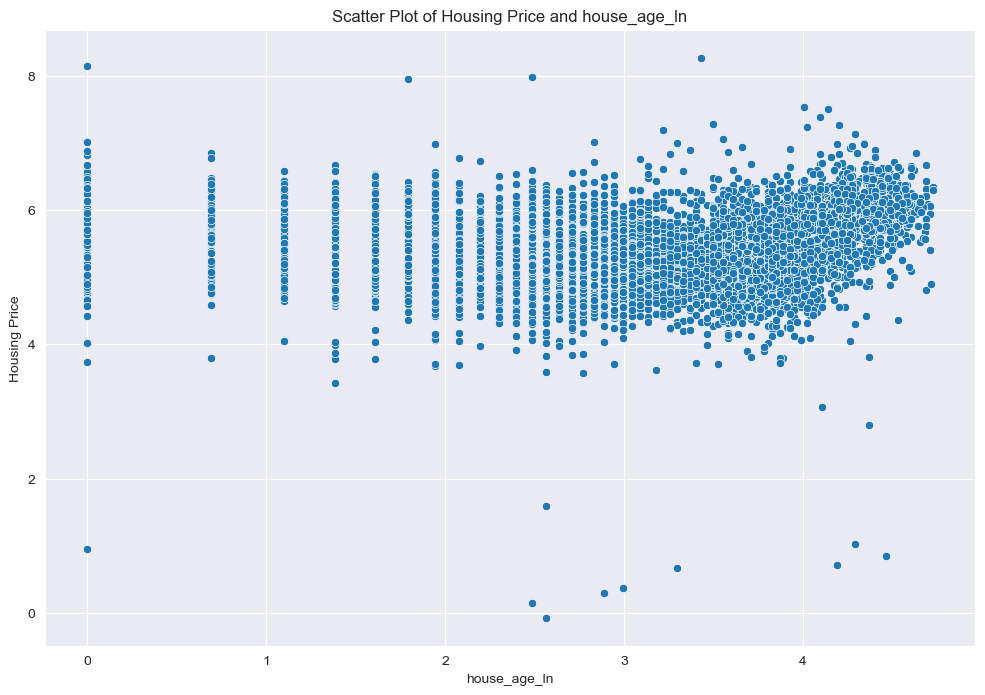

Pearson correlation coefficient: -0.09278166365964188
P-value: 5.22677352555851e-30


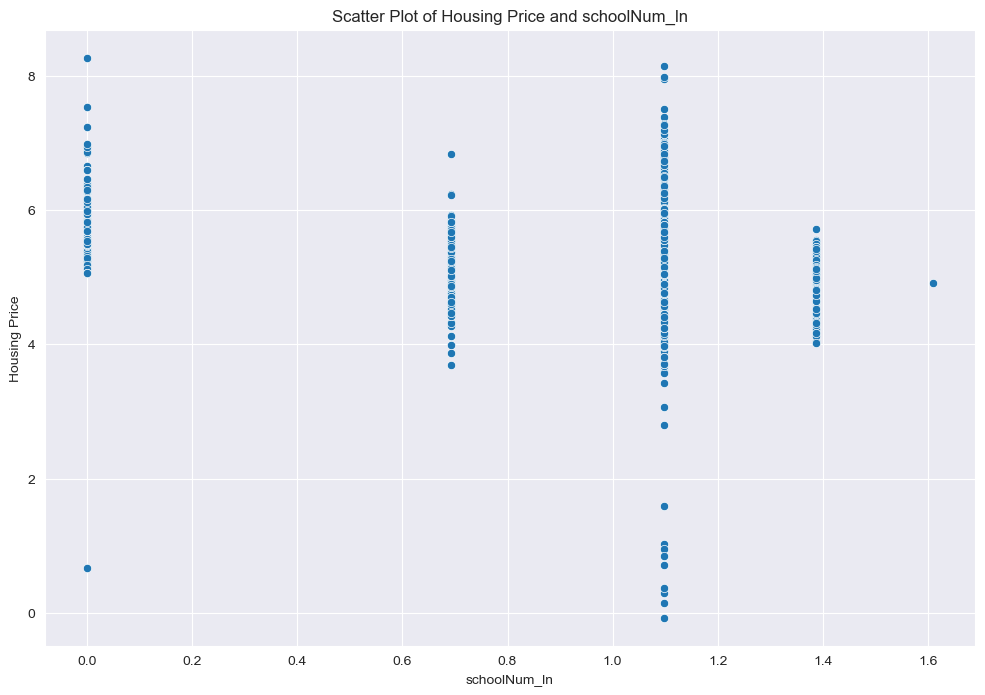

Pearson correlation coefficient: -0.1910563341009327
P-value: 3.673013618181924e-123


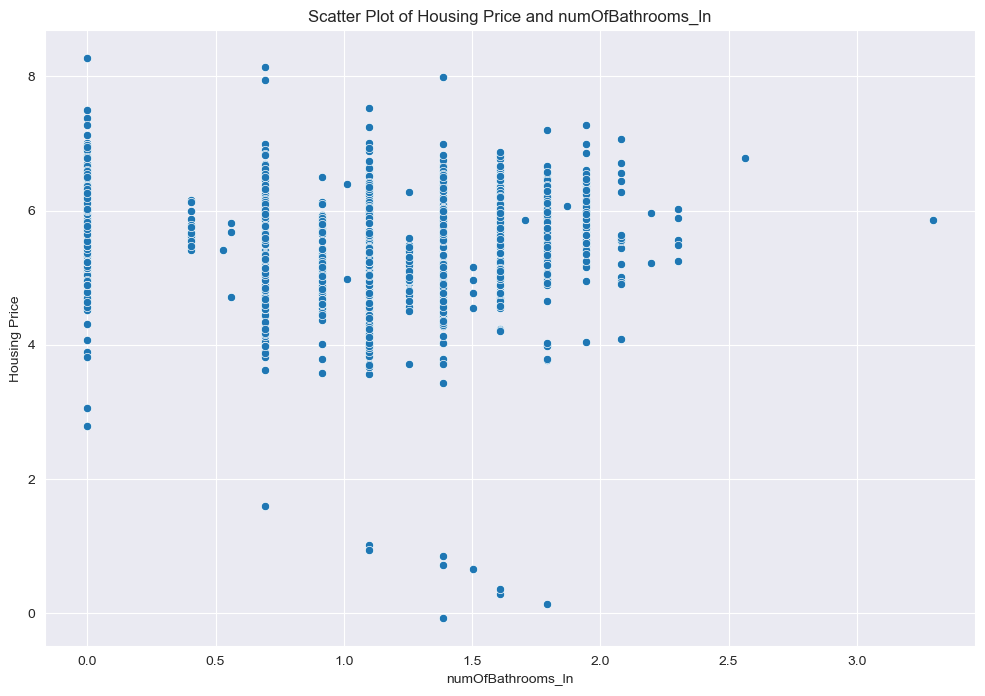

Pearson correlation coefficient: -0.2733181025767094
P-value: 6.410260728143365e-255


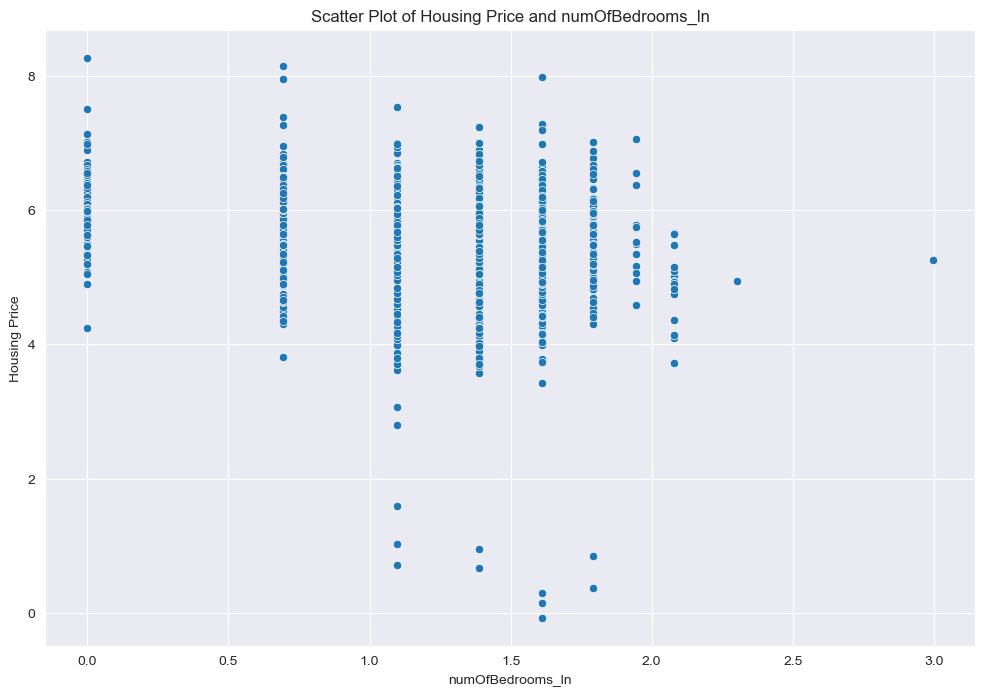

Pearson correlation coefficient: -0.18243890427337703
P-value: 2.71532962837576e-112


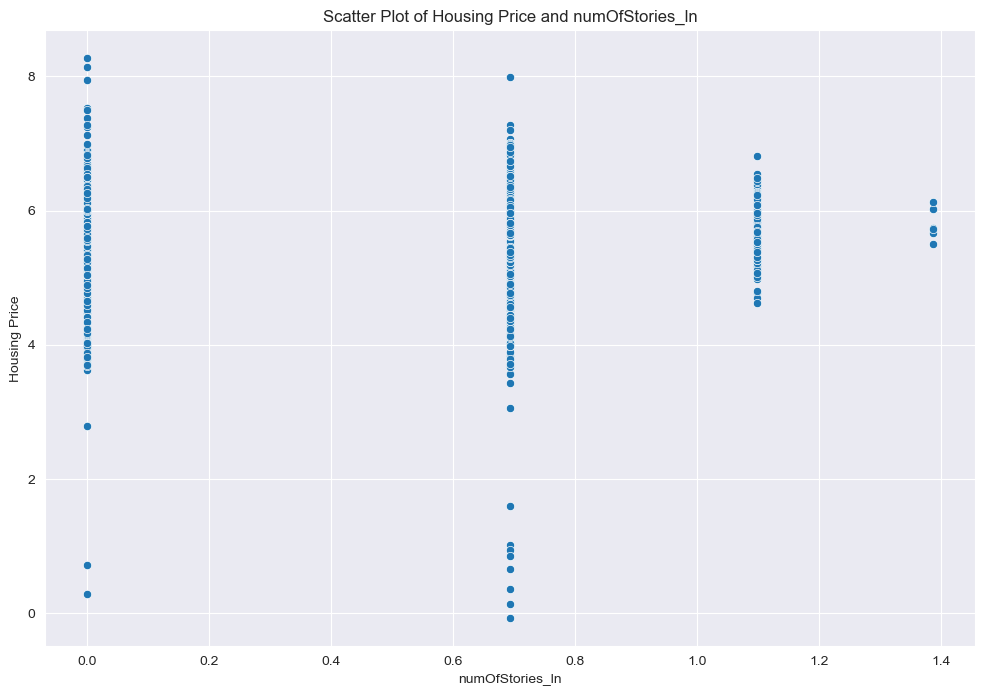

In [636]:
# Calculate Pearson correlation coefficient and plot
log_continunous_columns = [
    'livingAreaSqFt_ln',
    'lotSizeSqFt_ln',
    'propertyTaxRate_ln',
    'house_age_ln',
    'schoolNum_ln',
    'numOfBathrooms_ln',
    'numOfBedrooms_ln',
    'numOfStories_ln'
]

ydata = 'price_per_sqft_ln'
df = house_log_df

for col in log_continunous_columns:
    continunous_factor_relation(df, col, ydata)

In [637]:
# Save the file
house_log_df.to_csv('./source/housing_data_clean.csv')

## Data Modeling

### Hypothesis Testing

**hypothesis testing** is a statistical method used to determine whether there is enough evidence in a sample of data to infer that a certain condition is true for the entire population. It involves formulating a null hypothesis (typically stating that there is no effect or no difference) and an alternative hypothesis (indicating the presence of an effect or difference). The analysis then evaluates the likelihood that the observed data could have occurred under the null hypothesis.

1. **Null Hypothesis**: This is the default assumption that there is no effect, no difference, or no relationship between variables.

2. **Alternative Hypothesis**: This is the hypothesis that you want to test for. It is the opposite of the null hypothesis, suggesting that there is an effect, a difference, or a relationship.

3. **P-value**: The p-value is the probability of observing the data. A small p-value (typically ≤ 0.05) suggests that the observed data is unlikely under the null hypothesis, leading to its rejection in favor of the alternative hypothesis.

### Sampling

Since the original sample size was too large to use the p-value-based model building scheme, stratified sampling was performed by district，then hypothesis testing.

In [638]:
# Define a sampleing function
import math
import pandas as pd

# Define a sampling function
def get_sample(df, k=1, stratified_col=None, sample_by_n=True):
    """
    Sample from a DataFrame with optional stratification.

    Parameters:
    df (pd.DataFrame): The DataFrame to sample from.
    k (int or float): The sample size or fraction. If sample_by_n is True, this is the exact number of samples per group.
                      If sample_by_n is False, this is the fraction of each group to sample.
    stratified_col (list or None): A list of column names to stratify by. If None, simple random sampling is performed.
    sample_by_n (bool): If True, 'k' is treated as the exact number of samples per group. 
                        If False, 'k' is treated as a fraction of the group's size.

    Returns:
    pd.DataFrame: A DataFrame containing the sampled rows.
    """
    # If stratification is not required, perform simple random sampling
    if stratified_col is None:
        return df.sample(n=k) if sample_by_n else df.sample(frac=k)

    # Group by the specified stratified columns
    grouped = df.groupby(by=stratified_col)

    # Initialize an empty DataFrame to hold the results
    res_df = pd.DataFrame(columns=df.columns)

    # Perform stratified sampling
    for group_name, group in grouped:
        if sample_by_n:
            sample_size = min(k, len(group))  # Ensure we don't sample more than the group size
        else:
            sample_size = math.ceil(len(group) * k)

        group_sample = group.sample(n=sample_size)
        res_df = pd.concat([res_df, group_sample], ignore_index=True)

    return res_df

In [639]:
# Define a function to perform ANOVA
def calculate_p_value(df, categorical_col, ):
    """
    Calculate the p-value from an ANOVA test for a given categorical variable.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    dependent_var (str): The name of the dependent variable (e.g., 'price').
    categorical_var (str): The name of the categorical variable (e.g., 'dist').
    
    Returns:
    float: The p-value from the ANOVA test.
    """
    # Fit the ANOVA model
    anova_model = ols(f'price_per_sqft_ln ~ C({categorical_col})', data=df).fit()

    # Perform the ANOVA and get the p-value
    anova_table = sm.stats.anova_lm(anova_model, typ=2)
    p_value = anova_table["PR(>F)"][0]

    return p_value

In [640]:
# Group by 'zipcode' and count the number of samples in each group
zipcode_counts = house_log_df.groupby(['zipcode']).size().reset_index(name='count')

# Sort the results by 'count' in descending order
zipcode_counts_sorted = zipcode_counts.sort_values(by='count', ascending=False)

# Display the first few rows of the sorted result
zipcode_counts_sorted

,zipcode,count
37,78748,1134
34,78745,1025
38,78749,771
8,78704,691
28,78737,611
30,78739,603
23,78732,592
47,78759,557
14,78723,554
45,78757,513


Note： According to statistics, the sample size in the following areas is less than 50. Considering that the dataset has a total of 15,171 records, we choose to set the sample threshold at 50, directly deleting data with a sample size of less than 50 and setting the sampling ratio at 10%.

zipcode = [78660, 78619, 78734, 78701, 78719, 78737, 78742, 78653, 78652, 78746, 78653, 78724, 78745, 78754, 78738, 78748, 78652]

In [644]:
# Sampling
# Set the threshold
threshold = 50
small_zipcodes = zipcode_counts[zipcode_counts['count'] < threshold]['zipcode']

# Filter out zipcodes with small sample sizes
house_df_filtered = house_log_df[~house_df['zipcode'].isin(small_zipcodes.values)]

# Calculate the sampling fraction, e.g., 10%
sampling_fraction = 0.2

# Perform stratified sampling
sampled_df = get_sample(house_df_filtered, k=sampling_fraction, stratified_col=['zipcode'], sample_by_n=False)

# Check the sample size
print(sampled_df.shape)

sampled_df 

(2995, 20)


,zipcode,hasAssociation,hasGarage,hasCooling,hasHeating,hasSpa,hasView,homeType,avgSchoolRating,price_per_sqft,avgSchoolDistance_new,lotSizeSqFt_ln,livingAreaSqFt_ln,propertyTaxRate_ln,house_age_ln,price_per_sqft_ln,schoolNum_ln,numOfBathrooms_ln,numOfBedrooms_ln,numOfStories_ln
0,78617,1,0,1,1,0,0,Single Family,3.3,150.30,Very_Close,8.379309,7.192934,0.683097,2.302585,5.012633,1.098612,0.693147,1.098612,0.000000
1,78617,1,0,1,1,0,0,Single Family,3.0,150.83,Close,8.843038,7.189922,0.683097,2.708050,5.016153,1.098612,0.693147,1.098612,0.000000
2,78617,1,1,1,1,0,0,Single Family,3.0,148.90,Close,9.258845,7.372118,0.683097,0.693147,5.003275,1.098612,0.693147,1.098612,0.000000
3,78617,1,0,1,1,0,0,Single Family,3.3,49.81,Very_Close,8.527539,7.368970,0.683097,2.397895,3.908216,1.098612,0.693147,1.386294,0.000000
4,78617,1,1,1,1,0,0,Single Family,3.3,96.89,Very_Close,8.855521,7.632401,0.683097,2.079442,4.573576,1.098612,1.098612,1.098612,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,78759,0,0,1,1,0,0,Single Family,7.0,239.73,Very_Close,9.254740,7.846199,0.683097,3.737670,5.479513,1.098612,0.693147,1.386294,0.000000
2991,78759,0,0,1,1,0,1,Single Family,7.0,237.98,Very_Close,9.136479,7.640123,0.683097,3.988984,5.472187,1.098612,0.693147,1.098612,0.000000
2992,78759,0,1,1,1,0,0,Single Family,6.0,226.79,Close,9.101975,7.535830,0.683097,3.828641,5.424024,1.098612,0.693147,1.098612,0.000000
2993,78759,0,1,1,1,0,0,Single Family,6.7,156.80,Close,9.062304,7.199678,0.683097,3.761200,5.054971,1.098612,0.693147,1.098612,0.000000


In [645]:
sampled_df.columns

Index(['zipcode', 'hasAssociation', 'hasGarage', 'hasCooling', 'hasHeating',
       'hasSpa', 'hasView', 'homeType', 'avgSchoolRating', 'price_per_sqft',
       'avgSchoolDistance_new', 'lotSizeSqFt_ln', 'livingAreaSqFt_ln',
       'propertyTaxRate_ln', 'house_age_ln', 'price_per_sqft_ln',
       'schoolNum_ln', 'numOfBathrooms_ln', 'numOfBedrooms_ln',
       'numOfStories_ln'],
      dtype='object')

In [646]:
# List of categorical columns to test
categorical_cols = [
    'zipcode',
    'hasAssociation', 
    'hasCooling',
    'hasHeating', 
    'hasSpa', 
    'hasView', 
    'homeType',
    'avgSchoolDistance_new'
]

# Dictionary to store the p-values
p_values = {}

# Loop through each categorical column and calculate the p-value
for col in categorical_cols:
    p_value = calculate_p_value(sampled_df, col)
    p_values[col] = p_value
    print(f"Column: {col}, P-value: {p_value}")

Column: zipcode, P-value: 0.0
Column: hasAssociation, P-value: 5.890485493595148e-115
Column: hasCooling, P-value: 0.00029571667007959745
Column: hasHeating, P-value: 0.8918843249794594
Column: hasSpa, P-value: 0.02005347351975922
Column: hasView, P-value: 0.04973412713712265
Column: homeType, P-value: 0.03738153929135607
Column: avgSchoolDistance_new, P-value: 4.42135134293829e-24


#### **Interpretation of P-values**:

P-values help determine the strength of the evidence against the null hypothesis (which typically states that there is no effect or no relationship). Lower p-values indicate stronger evidence against the null hypothesis, suggesting that the variable in question has a significant relationship with the dependent variable (in this case, likely the housing price or a related metric).

- **P-value < 0.05**: Strong evidence against the null hypothesis; the variable is considered to have a statistically significant effect.
- **0.05 <= P-value < 0.1**: Suggestive evidence; the variable may have an effect, but it's not as strong or definitive.
- **P-value >= 0.1**: Weak evidence against the null hypothesis; the variable is not considered to have a significant effect.


#### **Observation**:

- **Strongly associated items**: `zipcode`, `hasAssociation`, `avgSchoolDistance_new`.
- **Moderately associated items**:  `hasView`, `hasCooling`.
- **Weak or no association**:  `hasHeating`,，`hasSpa`, `homeType`.


### Observe the Continuous variables in sample dataset 

Pearson correlation coefficient: -0.22378867691849424
P-value: 2.1075993578497467e-169


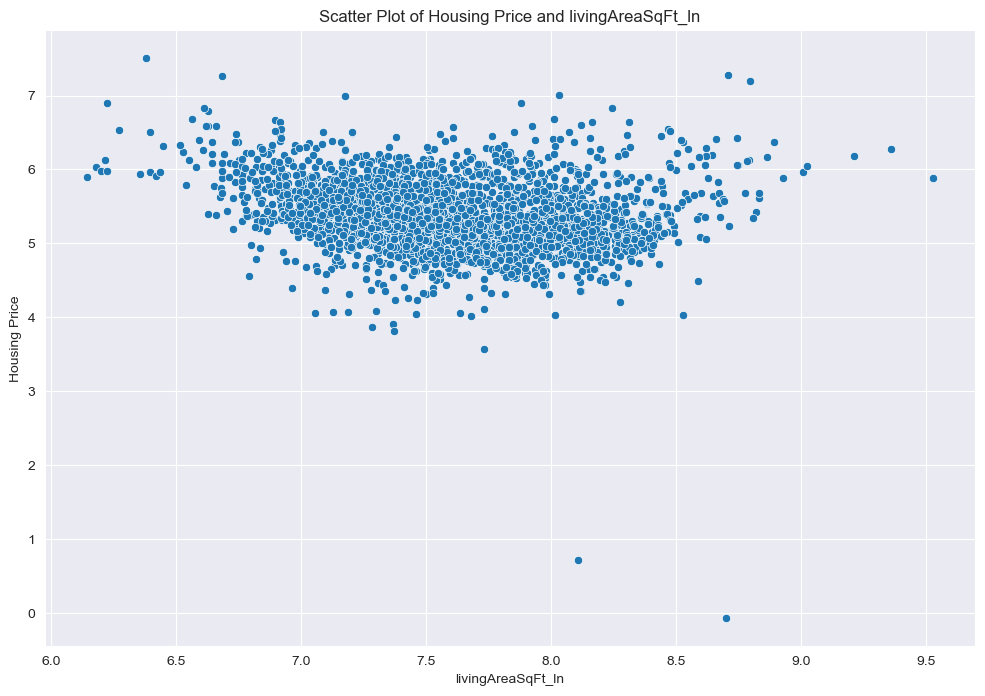

Pearson correlation coefficient: 0.06133375597300657
P-value: 5.734300286859579e-14


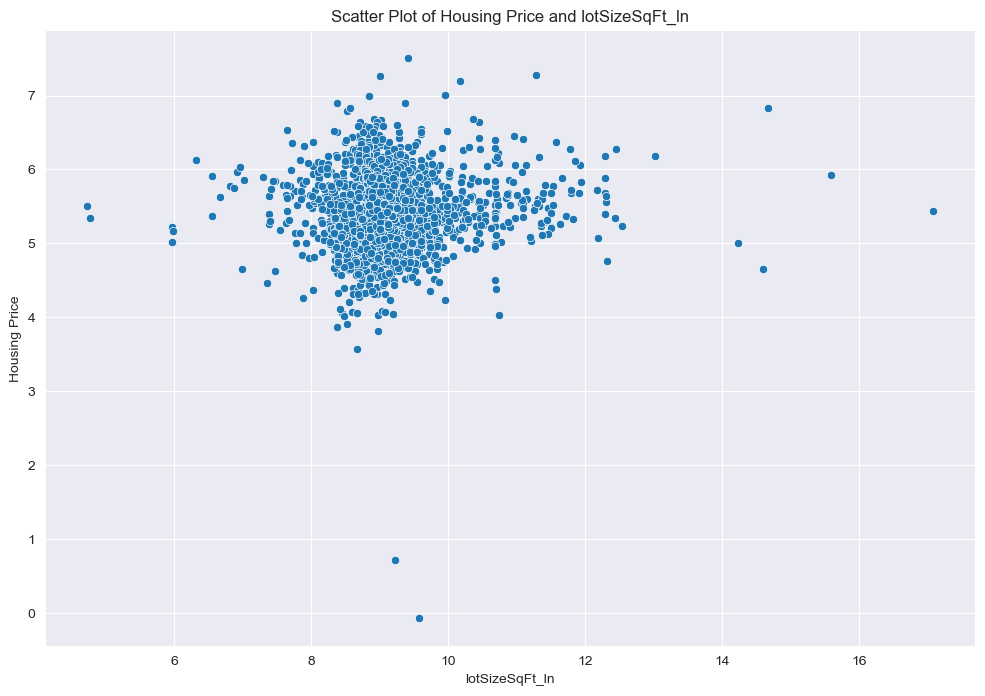

Pearson correlation coefficient: -0.17486868778379255
P-value: 3.480558089154891e-103


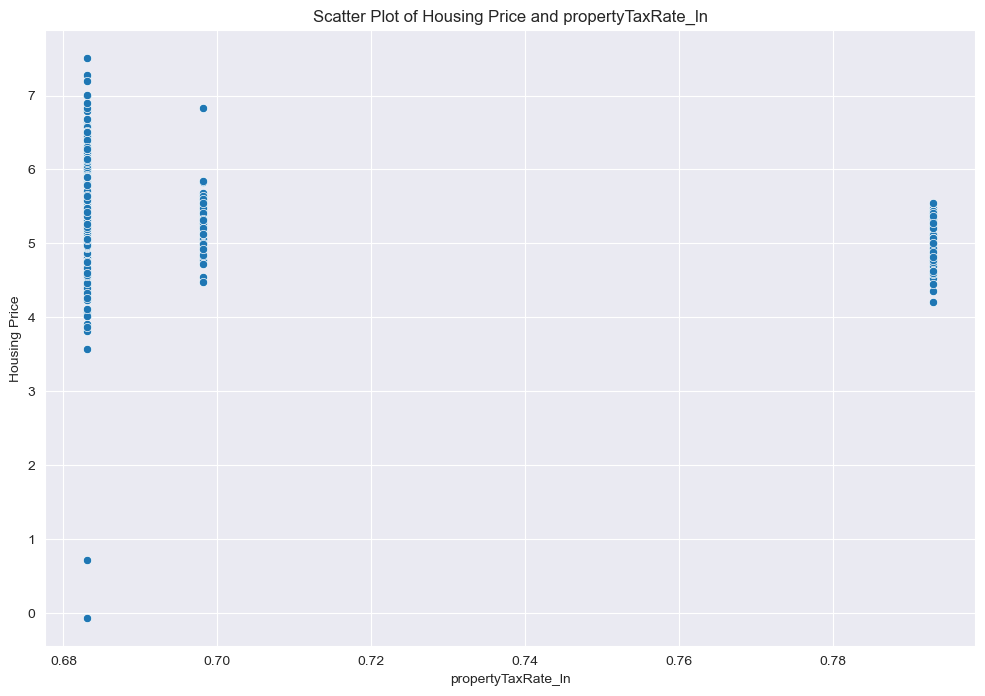

Pearson correlation coefficient: 0.16773079909621053
P-value: 5.6948064886265843e-95


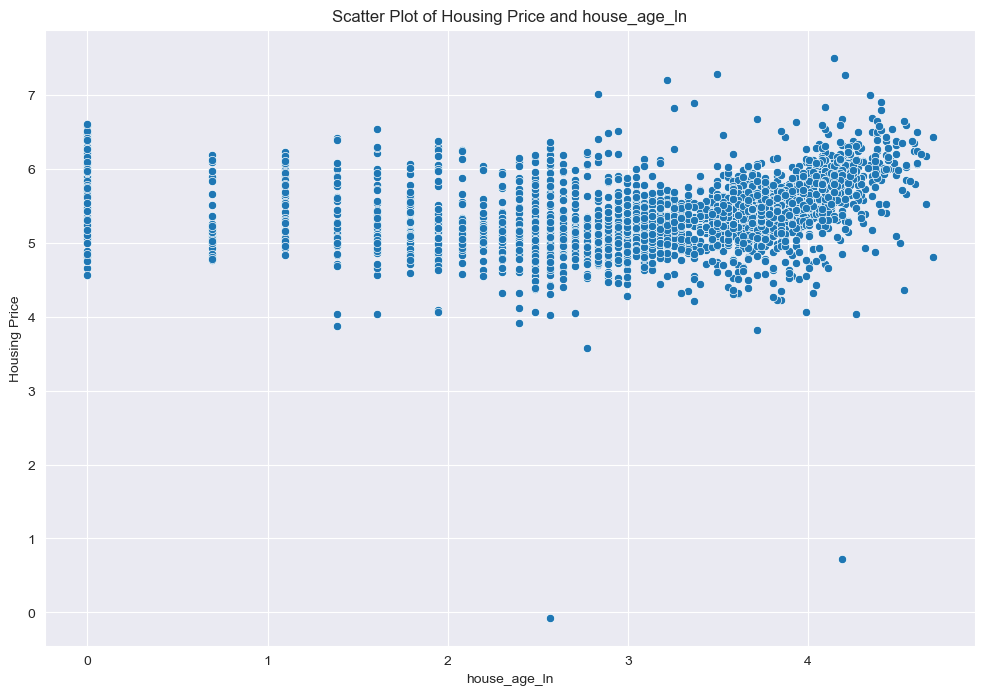

Pearson correlation coefficient: -0.09278166365964188
P-value: 5.22677352555851e-30


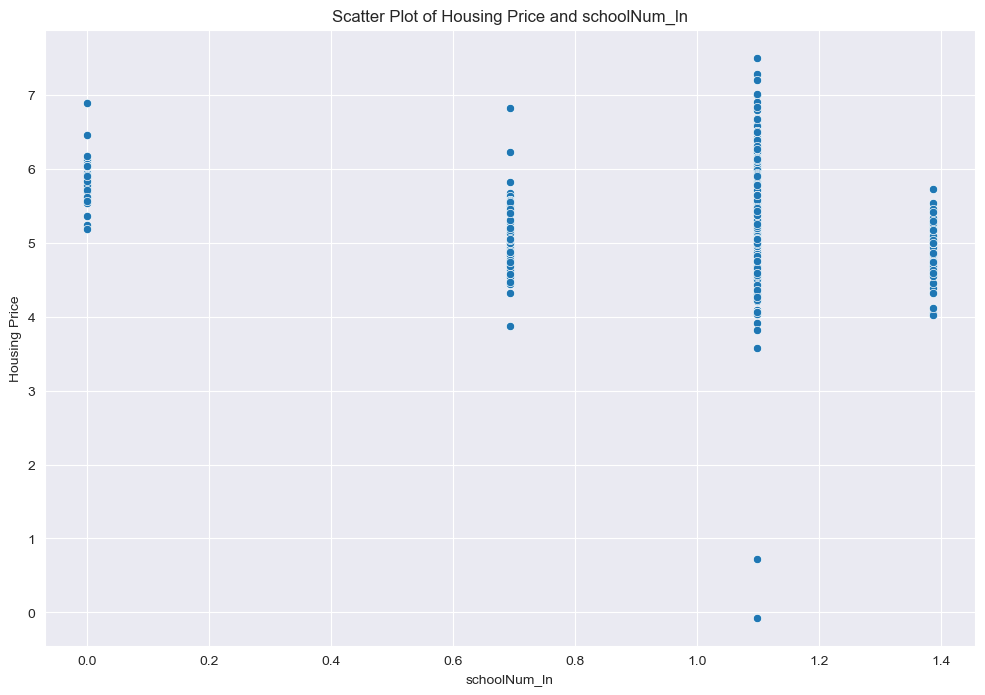

Pearson correlation coefficient: -0.1910563341009327
P-value: 3.673013618181924e-123


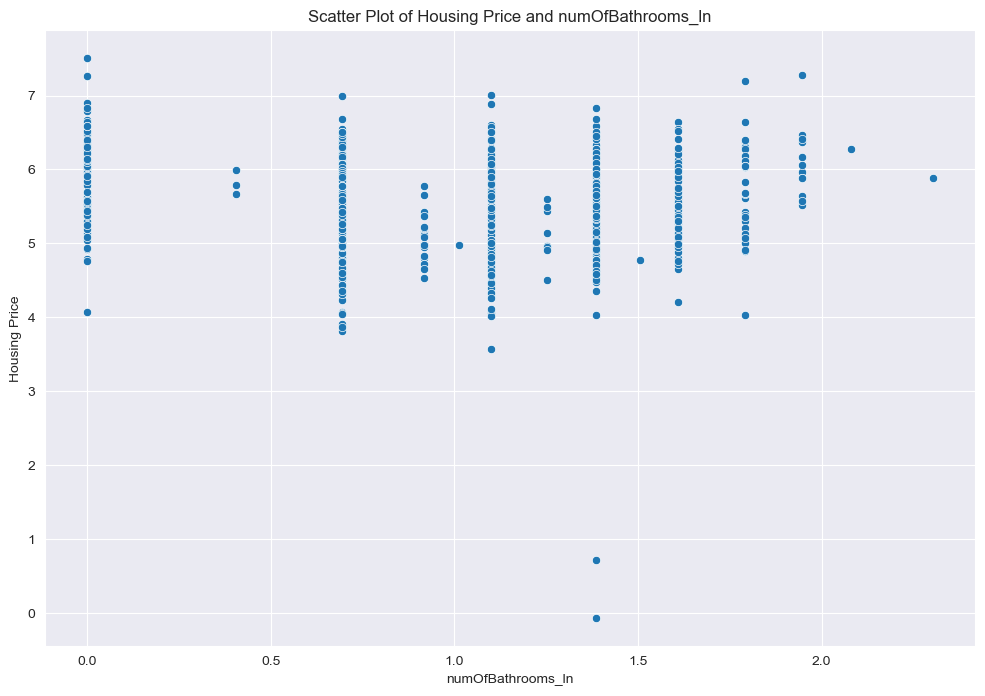

Pearson correlation coefficient: -0.2733181025767094
P-value: 6.410260728143365e-255


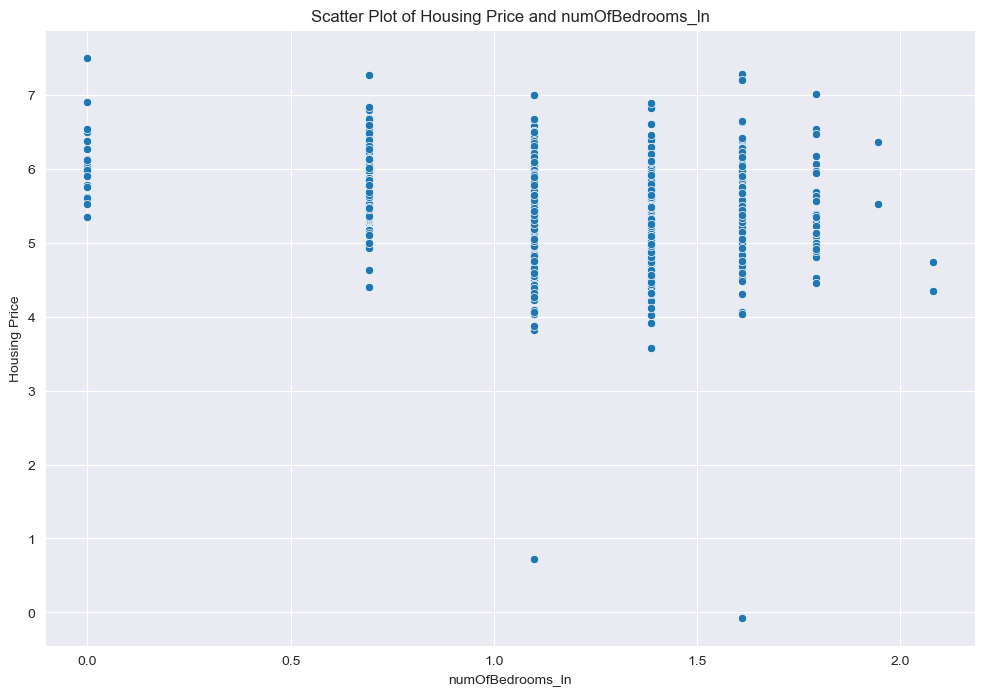

Pearson correlation coefficient: -0.18243890427337703
P-value: 2.71532962837576e-112


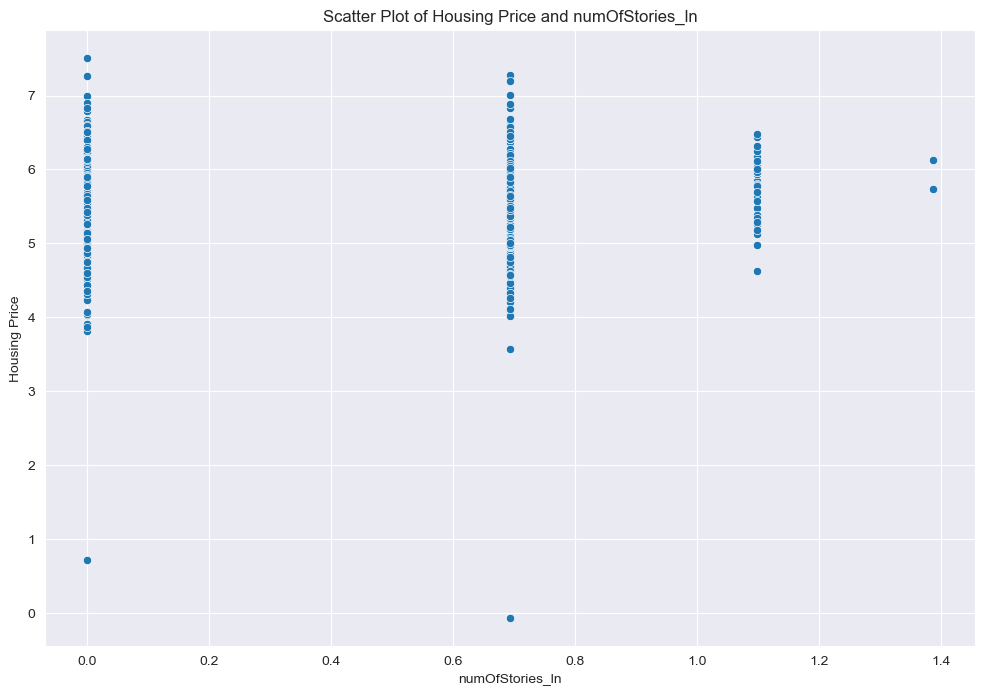

In [647]:
# Calculate Pearson correlation coefficient and plot
sample_continunous_columns = [
    'livingAreaSqFt_ln',
    'lotSizeSqFt_ln',
    'propertyTaxRate_ln',
    'house_age_ln',
    'schoolNum_ln',
    'numOfBathrooms_ln',
    'numOfBedrooms_ln',
    'numOfStories_ln'
]

ydata = 'price_per_sqft_ln'
df = sampled_df

for col in log_continunous_columns:
    continunous_factor_relation(df, col, ydata)

Observation and Analysis:

In the correlation analysis between continuous variables and housing prices, the results are as follows:

1. **schoolNum_ln**:
- **Pearson Correlation Coefficient**: -0.090923
- **P-value**: 3.9637114505677404e-29
- **Interpretation**: There is a slight negative correlation between this variable and housing prices, but the correlation is weak. Although the P-value is very small, indicating strong statistical significance, the actual correlation is not substantial; therefore, it may have limited help in predictive models.

2. **house_age_ln**:
- **Pearson Correlation Coefficient**: 0.171791
- **P-value**: 1.711478906261298e-100
- **Interpretation**: There is a certain degree of positive correlation between house age and housing prices. While the association level is low, it has some predictive value, and the extremely low P-value indicates that the result is highly significant.

3. **propertyTaxRate_ln**:
- **Pearson Correlation Coefficient**: -0.172545
- **P-value**: 2.2594466147633894e-101
- **Interpretation**: There exists a certain negative correlation between property tax rate and housing prices. Although the association level isn't strong, it is statistically significant and may be helpful for predictions.

4. **lotSizeSqFt_ln**:
- **Pearson Correlation Coefficient:** 0.056380
– P-value:** 3 .9863330248365714 e –12
– Interpretation:** The relationship between lot size area and housing prices is very weak; although the P-value shows statistical significance, its actual impact can almost be ignored.

5. **livingAreaSqFt_ln**:
– Pearson Correlation Coefficient:** –0 .237423
- P-value:** 9 .16373487296581 e –193
– Interpretation:** There exists a clear negative relationship between living area and housing prices with an extremely low P-value indicating high statistical significance for this result; this could be an important predictive variable.

6. **numOfBathrooms_ln (Log of Number of Bathrooms)**:

   - **Pearson Coefficient**: -0.191
   - **Interpretation**: This negative correlation coefficient indicates that as the number of bathrooms increases, the price per unit of housing slightly decreases. Although this relationship exists, the correlation is weak. A coefficient close to 0 suggests that this variable may not be a significant predictor of housing prices, but its slight negative correlation should still be considered.

7. **numOfBedrooms_ln (Log of Number of Bedrooms)**:

   - **Pearson Coefficient**: -0.273
   - **Interpretation**: This negative correlation coefficient is slightly stronger than that for the number of bathrooms, indicating that as the number of bedrooms increases, housing prices decrease more significantly. However, the correlation remains weak, which may suggest that the number of bedrooms is also not an important factor in predicting housing prices.

8. **numOfStories_ln (Log of Number of Stories)**:

   - **Pearson Coefficient**: -0.182
   - **Interpretation**: This coefficient shows a negative correlation between the number of stories and housing prices; specifically, as the number of stories increases, there is a downward trend in housing prices. However, this coefficient also indicates a weak correlation.

Overall, these three variables all show a negative correlation with housing prices; however, these associations are relatively weak. This suggests that while these variables may have some impact, they are not among the strongest predictors.


### Summary

Among these variables, ***house_age_ln*** and ***livingAreaSqFt_ln*** are important factors worth including in predictive models. Although their associations are not particularly strong, they still possess some predictive value while other influences like ***propertyTaxRate_ln*** are relatively minor but could also be considered for inclusion in models.


In [648]:
# Calculate the min value of price per square feat 
group_columns = ['zipcode', 'hasAssociation',  'avgSchoolDistance_new']

for col in group_columns:
    avg_price_df = (
        sampled_df.groupby(col)['price_per_sqft_ln']
        .mean()
        .sort_values(ascending=True)
    )
    print(f'--- Grouped by {col} ---')
    print(avg_price_df.head(1))
    print('\n')


--- Grouped by zipcode ---
zipcode
78617    4.782635
Name: price_per_sqft_ln, dtype: float64


--- Grouped by hasAssociation ---
hasAssociation
1    5.199037
Name: price_per_sqft_ln, dtype: float64


--- Grouped by avgSchoolDistance_new ---
avgSchoolDistance_new
Moderate    5.261039
Name: price_per_sqft_ln, dtype: float64




In [649]:
# For multiple categorical variables, generate dummy variables
data01 = pd.get_dummies(sampled_df[['zipcode', 'avgSchoolDistance_new','hasAssociation']])

# check
data01.head()

,zipcode_78617,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,...,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,avgSchoolDistance_new_Very_Close,avgSchoolDistance_new_Close,avgSchoolDistance_new_Moderate,avgSchoolDistance_new_Far,hasAssociation_0,hasAssociation_1
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [650]:
data01.columns

Index(['zipcode_78617', 'zipcode_78702', 'zipcode_78703', 'zipcode_78704',
       'zipcode_78705', 'zipcode_78717', 'zipcode_78721', 'zipcode_78722',
       'zipcode_78723', 'zipcode_78724', 'zipcode_78725', 'zipcode_78726',
       'zipcode_78727', 'zipcode_78728', 'zipcode_78729', 'zipcode_78730',
       'zipcode_78731', 'zipcode_78732', 'zipcode_78733', 'zipcode_78735',
       'zipcode_78736', 'zipcode_78737', 'zipcode_78739', 'zipcode_78741',
       'zipcode_78744', 'zipcode_78745', 'zipcode_78746', 'zipcode_78747',
       'zipcode_78748', 'zipcode_78749', 'zipcode_78750', 'zipcode_78751',
       'zipcode_78752', 'zipcode_78753', 'zipcode_78754', 'zipcode_78756',
       'zipcode_78757', 'zipcode_78758', 'zipcode_78759',
       'avgSchoolDistance_new_Very_Close', 'avgSchoolDistance_new_Close',
       'avgSchoolDistance_new_Moderate', 'avgSchoolDistance_new_Far',
       'hasAssociation_0', 'hasAssociation_1'],
      dtype='object')

In [651]:
# Delete reference group: 'zipcode_78617', 'hasAssociation_1', 'avgSchoolDistance_new_Moderate'
data01.drop(['zipcode_78617', 'hasAssociation_1', 'avgSchoolDistance_new_Moderate'], axis=1, inplace=True)

# check
data01.head()

,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,zipcode_78725,...,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,avgSchoolDistance_new_Very_Close,avgSchoolDistance_new_Close,avgSchoolDistance_new_Far,hasAssociation_0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [652]:
data02 = pd.concat([sampled_df[['house_age_ln', 'propertyTaxRate_ln', 'livingAreaSqFt_ln','price_per_sqft_ln']],
                    data01],
                   axis=1)
# Review
data02

,house_age_ln,propertyTaxRate_ln,livingAreaSqFt_ln,price_per_sqft_ln,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78721,...,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,avgSchoolDistance_new_Very_Close,avgSchoolDistance_new_Close,avgSchoolDistance_new_Far,hasAssociation_0
0,2.302585,0.683097,7.192934,5.012633,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2.708050,0.683097,7.189922,5.016153,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.693147,0.683097,7.372118,5.003275,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2.397895,0.683097,7.368970,3.908216,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2.079442,0.683097,7.632401,4.573576,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,3.737670,0.683097,7.846199,5.479513,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
2991,3.988984,0.683097,7.640123,5.472187,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
2992,3.828641,0.683097,7.535830,5.424024,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True
2993,3.761200,0.683097,7.199678,5.054971,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


## Log Linear Regression Model

In [653]:
data02.columns

Index(['house_age_ln', 'propertyTaxRate_ln', 'livingAreaSqFt_ln',
       'price_per_sqft_ln', 'zipcode_78702', 'zipcode_78703', 'zipcode_78704',
       'zipcode_78705', 'zipcode_78717', 'zipcode_78721', 'zipcode_78722',
       'zipcode_78723', 'zipcode_78724', 'zipcode_78725', 'zipcode_78726',
       'zipcode_78727', 'zipcode_78728', 'zipcode_78729', 'zipcode_78730',
       'zipcode_78731', 'zipcode_78732', 'zipcode_78733', 'zipcode_78735',
       'zipcode_78736', 'zipcode_78737', 'zipcode_78739', 'zipcode_78741',
       'zipcode_78744', 'zipcode_78745', 'zipcode_78746', 'zipcode_78747',
       'zipcode_78748', 'zipcode_78749', 'zipcode_78750', 'zipcode_78751',
       'zipcode_78752', 'zipcode_78753', 'zipcode_78754', 'zipcode_78756',
       'zipcode_78757', 'zipcode_78758', 'zipcode_78759',
       'avgSchoolDistance_new_Very_Close', 'avgSchoolDistance_new_Close',
       'avgSchoolDistance_new_Far', 'hasAssociation_0'],
      dtype='object')

In [655]:
# Predict

# Include all the provided column names in the formula
# Construct the regression formula
formula = "price_per_sqft_ln ~ zipcode_78702 + zipcode_78703 + zipcode_78704 + zipcode_78705 + zipcode_78717 + zipcode_78721 + zipcode_78722 + zipcode_78723 + zipcode_78724 + zipcode_78725 + zipcode_78726 + zipcode_78727 + zipcode_78728 + zipcode_78729 + zipcode_78730 + zipcode_78731 + zipcode_78732 + zipcode_78733 + zipcode_78735 + zipcode_78736 + zipcode_78737 + zipcode_78739 + zipcode_78741 + zipcode_78744 + zipcode_78745 + zipcode_78746 + zipcode_78747 + zipcode_78748 + zipcode_78749 + zipcode_78750 + zipcode_78751 + zipcode_78752 + zipcode_78753 + zipcode_78754 + zipcode_78756 + zipcode_78757 + zipcode_78758 + zipcode_78759 + avgSchoolDistance_new_Very_Close + avgSchoolDistance_new_Close + avgSchoolDistance_new_Far + hasAssociation_0 + house_age_ln + propertyTaxRate_ln + livingAreaSqFt_ln"

# Fit the model
lm1 = ols(formula, data=data02).fit()

# Display the summary of the regression model
lm1_summary = lm1.summary()
lm1_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_per_sqft_ln   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     76.27
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:53:48   Log-Likelihood:                -712.33
No. Observations:                2995   AIC:                             1517.
Df Residuals:                    2949   BIC:                             1793.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    9.6091      0.644     14.912      0.000       8.346      10.873
zipcode_78702[T.True]                        0.9690      0.084     11.558      0.000       0.805       1.133
zipcode_78703[T.True]                        1.1709      0.087     13.491      0.000       1.001       1.341
zipcode_78704[T.True]                        1.2446      0.081     15.456      0.000       1.087       1.402
zipcode_78705[T.True]                        1.1783      0.115     10.270      0.000       0.953       1.403
zipcode_78717[T.True]                        0.8699      0.130      6.715      0.000       0.616       1.124
zipcode_78721[T.True]                        0.6755      0.088      7.651      0.000       0.502       0.849
zipcode_78722[T.True]                        0.9960      0.104      9.558      0.000       0.792       1.200
zipcode_78723[T.True]                        0.6996      0.082      8.564      0.000       0.539       0.860
zipcode_78724[T.True]                        0.2830      0.088      3.201      0.001       0.110       0.456
zipcode_78725[T.True]                        0.1177      0.093      1.271      0.204      -0.064       0.299
zipcode_78726[T.True]                        0.4979      0.092      5.402      0.000       0.317       0.679
zipcode_78727[T.True]                        0.5015      0.083      6.018      0.000       0.338       0.665
zipcode_78728[T.True]                        0.3791      0.089      4.262      0.000       0.205       0.554
zipcode_78729[T.True]                        0.8021      0.128      6.274      0.000       0.551       1.053
zipcode_78730[T.True]                        0.9079      0.089     10.152      0.000       0.733       1.083
zipcode_78731[T.True]                        1.0562      0.083     12.731      0.000       0.894       1.219
zipcode_78732[T.True]                        0.5768      0.082      7.030      0.000       0.416       0.738
zipcode_78733[T.True]                        0.9950      0.091     10.875      0.000       0.816       1.174
zipcode_78735[T.True]                        0.8650      0.089      9.682      0.000       0.690       1.040
zipcode_78736[T.True]                        0.5344      0.095      5.598      0.000       0.347       0.722
zipcode_78737[T.True]                        0.5603      0.083      6.720      0.000       0.397       0.724
zipcode_78739[T.True]                        0.6135      0.081      7.533      0.000       0.454       0.773
zipcode_78741[T.True]                        0.5003      0.089      5.594      0.000       0.325       0.676
zipcode_78744[T.True]                        0.2352      0.082      2.866      0.004       0.074       0.396
zipcode_78745[T.True]          

<Axes: xlabel='pred1', ylabel='resid1'>

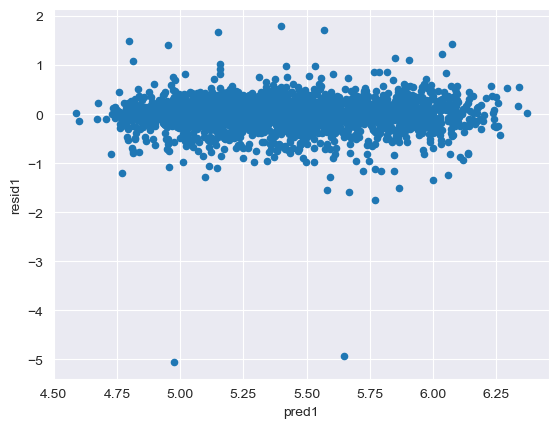

In [659]:
# Model evaluation： residual plot
data02['pred1']=lm1.predict(data02)
data02['resid1']=lm1.resid
data02.plot('pred1','resid1',kind='scatter')

### Observsation & Analysis

This residual plot shows the relationship between the model's predicted values (`pred1`) and the residuals (`resid1`). The following points can be drawn:

1. **Residual Distribution**: Most of the residuals are concentrated around 0, indicating that the differences between predicted and actual values are small, which suggests a high overall accuracy of the model.

2. **Randomness of Residuals**: The residuals in the plot appear to be randomly distributed on both sides of the predicted values, with no obvious patterns or trends, implying that model assumptions (such as independence and normal distribution in linear regression) may hold true.

3. **Outliers**: There are some points in the plot that are far from 0; these may represent outliers or data points that have not been well fitted.

In summary, this residual plot indicates that the model performs well, with no apparent patterns or trends in the residual distribution, and that model assumptions seem reasonable for this dataset. However, to further

## Step 4: Housing Price

Suppose there is a family of three, and the parents wish for their child to attend school in Dongcheng District, planning to purchase a 2000-square-feat at zipcode 78731, house age <= 5; how much would it approximately cost?

In [656]:
# define x_new
x_new = data02.head(1)
x_new['zipcode_78617'] = 0
x_new['zipcode_78731'] = 1
x_new['livingAreaSqFt_ln'] = np.log(2000)
x_new['house_age_ln'] = np.log(5)
x_new['avgSchoolDistance_new_Close'] = 1

# Review
x_new

,house_age_ln,propertyTaxRate_ln,livingAreaSqFt_ln,price_per_sqft_ln,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78721,...,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,avgSchoolDistance_new_Very_Close,avgSchoolDistance_new_Close,avgSchoolDistance_new_Far,hasAssociation_0,zipcode_78617
0,1.609438,0.683097,7.600902,5.012633,False,False,False,False,False,False,...,False,False,False,False,False,True,1,False,False,0


In [658]:
# Prediction
# Predict number is log number, therefore I need to convert this into oariginal price by math.exp
predict_price = round(math.exp(lm1.predict(x_new)),2)
total_price = predict_price * 2000 / 1000

print(f"House Price: {round(predict_price, 2)} $/sqft， Total House Price: {round(total_price, 2)} K")

House Price: 308.43 $/sqft， Total House Price: 616.86 K
